# Data analysis notebook for EDA project

This is the data analysis notebook part of the EDA project. First of the notebook describes Exploratory Data Analysis pipeline for the Loan data and second part contains loan data analysis and visualisation.

In [1]:
import pandas as pd

In [2]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [181]:
import matplotlib.pyplot as plt
import matplotlib.style as style
import matplotlib.ticker as mtick

import seaborn as sns
from statsmodels.graphics.gofplots import qqplot
import numpy as np

In [4]:
import warnings
warnings.filterwarnings('ignore')

In [182]:
from dataprep.eda import plot as plot_eda

In [6]:
from eda_utils import DataTransform, DataFrameInfo, DataFrameVisualize, DataFrameTransform

In [7]:
df = pd.read_csv("data/loan_payments.csv")

In [8]:
df.head()

id  member_id  loan_amount  funded_amount  funded_amount_inv  \
0  38676116   41461848         8000         8000.0             8000.0   
1  38656203   41440010        13200        13200.0            13200.0   
2  38656154   41439961        16000        16000.0            16000.0   
3  38656128   41439934        15000        15000.0            15000.0   
4  38656121   41439927        15000        15000.0            15000.0   

        term  int_rate  instalment grade sub_grade employment_length  \
0  36 months      7.49      248.82     A        A4           5 years   
1  36 months      6.99      407.52     A        A3           9 years   
2  36 months      7.49      497.63     A        A4           8 years   
3  36 months     14.31      514.93     C        C4            1 year   
4  36 months      6.03      456.54     A        A1         10+ years   

  home_ownership  annual_inc verification_status issue_date loan_status  \
0       MORTGAGE     46000.0        Not Verified   Jan-2021     Current   
1           RENT     50000.0        Not Verified   Jan-2021     Current   
2       MORTGAGE     73913.0     Source Verified   Jan-2021  Fully Paid   
3           RENT     42000.0     Source Verified   Jan-2021  Fully Paid   
4       MORTGAGE    145000.0            Verified   Jan-2021     Current   

  payment_plan             purpose    dti  delinq_2yrs earliest_credit_line  \
0            n         credit_card  19.54            2             Oct-1987   
1            n         credit_card  24.20            0             Sep-2001   
2            n         credit_card  16.92            0             Sep-1998   
3            n  debt_consolidation  35.52            0             Jun-2008   
4            n  debt_consolidation   3.33            0             Apr-2002   

   inq_last_6mths  mths_since_last_delinq  mths_since_last_record  \
0               1                     5.0                     NaN   
1               0                     NaN                     NaN   
2               0                    69.0                     NaN   
3               0                    74.0                     NaN   
4               1                    37.0                     NaN   

   open_accounts  total_accounts  out_prncp  out_prncp_inv  total_payment  \
0             12              27    5529.70        5529.70        2982.51   
1             15              31    9102.83        9102.83        4885.11   
2              7              18       0.00           0.00       16824.54   
3              6              13       0.00           0.00       15947.47   
4             23              50   10297.47       10297.47        5473.46   

   total_payment_inv  total_rec_prncp  total_rec_int  total_rec_late_fee  \
0            2982.51          2470.30         512.21                 0.0   
1            4885.11          4097.17         787.94                 0.0   
2           16824.54         16000.00         824.54                 0.0   
3           15947.47         15000.00         947.47                 0.0   
4            5473.46          4702.53         770.93                 0.0   

   recoveries  collection_recovery_fee last_payment_date  last_payment_amount  \
0         0.0                      0.0          Jan-2022               248.82   
1         0.0                      0.0          Jan-2022               407.52   
2         0.0                      0.0          Oct-2021             12850.16   
3         0.0                      0.0          Jun-2021             13899.67   
4         0.0                      0.0          Jan-2022               456.54   

  next_payment_date last_credit_pull_date  collections_12_mths_ex_med  \
0          Feb-2022              Jan-2022                         0.0   
1          Feb-2022              Jan-2022                         0.0   
2               NaN              Oct-2021                         0.0   
3               NaN              Jun-2021                         0.0   
4          Feb-2022     

Dataprep is an useful tool to automate some of the EDA tasks. Here the plot_eda function is used to plot all columns. 

In [184]:
#plot_eda(df)

Next we instantiate the helper classes that we ll be used throughout the notebook to perfrom data cleaning, data transformatuon and plotting.

In [10]:
data_transform = DataTransform()
dataframe_transform = DataFrameTransform()
data_plot = DataFrameVisualize()
dataframe_info = DataFrameInfo()

Let's find out some information about the datasets. 

In [11]:
df.shape

(54231, 43)

In [12]:
df.describe()

id     member_id   loan_amount  funded_amount  \
count  5.423100e+04  5.423100e+04  54231.000000   51224.000000   
mean   7.621797e+06  8.655350e+06  13333.076100   13229.509117   
std    9.571362e+06  1.031281e+07   8082.196709    8019.017599   
min    5.552100e+04  7.069400e+04    500.000000     500.000000   
25%    7.594330e+05  9.587720e+05   7000.000000    7000.000000   
50%    7.084590e+06  8.709873e+06  12000.000000   12000.000000   
75%    8.860616e+06  1.052714e+07  18000.000000   18000.000000   
max    3.867612e+07  4.146185e+07  35000.000000   35000.000000   

       funded_amount_inv      int_rate    instalment    annual_inc  \
count       54231.000000  49062.000000  54231.000000  5.423100e+04   
mean        12952.622979     13.507328    400.013953  7.222085e+04   
std          8099.473527      4.392893    238.920012  5.158934e+04   
min             0.000000      5.420000     15.670000  3.300000e+03   
25%          6700.000000     10.370000    224.205000  4.500000e+04   
50%         11300.000000     13.160000    347.150000  6.100000e+04   
75%         18000.000000     16.200000    527.550000  8.600000e+04   
max         35000.000000     26.060000   1407.010000  2.039784e+06   

                dti   delinq_2yrs  inq_last_6mths  mths_since_last_delinq  \
count  54231.000000  54231.000000    54231.000000             23229.00000   
mean      15.867087      0.241799        0.893843                34.01920   
std        7.623124      0.706706        1.261421                21.92324   
min        0.000000      0.000000        0.000000                 0.00000   
25%       10.200000      0.000000        0.000000                15.00000   
50%       15.600000      0.000000        1.000000                31.00000   
75%       21.260000      0.000000        1.000000                49.00000   
max       39.910000     18.000000       33.000000               146.00000   

       mths_since_last_record  open_accounts  total_accounts     out_prncp  \
count             6181.000000   54231.000000    54231.000000  54231.000000   
mean                74.829154      10.559809       24.168206   2753.964172   
std                 36.137264       4.797169       11.587025   5154.893646   
min                  0.000000       1.000000        1.000000      0.000000   
25%                 53.000000       7.000000       16.000000      0.000000   
50%                 87.000000      10.000000       23.000000      0.000000   
75%                103.000000      13.000000       31.000000   3397.325000   
max                119.000000      53.000000      108.000000  32399.940000   

       out_prncp_inv  total_payment  total_payment_inv  total_rec_prncp  \
count   54231.000000   54231.000000       54231.000000     54231.000000   
mean     2752.568147   12079.208480       11788.946618      9407.048589   
std      5153.043643    8391.043845        8363.508506      6958.124264   
min         0.000000       0.000000           0.000000         0.000000   
25%         0.000000    5895.210000        5658.815000      4264.350000   
50%         0.000000   10113.250000        9835.830000      7644.920000   
75%      3394.980000   16272.895000       15978.200000     12505.625000   
max     32399.940000   55758.222084       55061.000000     35000.020000   

       total_rec_int  total_rec_late_fee    recoveries  \
count   54231.000000        54231.000000  54231.000000   
mean     2577.757101            0.901512     93.501288   
std      2581.657345            6.215792    630.843636   
min         0.000000            0.000000      0.000000   
25%       889.560000            0.000000      0.000000   
50%      1734.640000            0.000000      0.000000   
75%      3323.765000            0.000000      0.000000   
max     23062.450000          358.680000  27750.000000   

       collection_recovery_fee  last_payment_amount  \
count             54231.000000         54231.000000   
mean                 10.859057          3130.706393   
std                 120.193950

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54231 entries, 0 to 54230
Data columns (total 43 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   id                           54231 non-null  int64  
 1   member_id                    54231 non-null  int64  
 2   loan_amount                  54231 non-null  int64  
 3   funded_amount                51224 non-null  float64
 4   funded_amount_inv            54231 non-null  float64
 5   term                         49459 non-null  object 
 6   int_rate                     49062 non-null  float64
 7   instalment                   54231 non-null  float64
 8   grade                        54231 non-null  object 
 9   sub_grade                    54231 non-null  object 
 10  employment_length            52113 non-null  object 
 11  home_ownership               54231 non-null  object 
 12  annual_inc                   54231 non-null  float64
 13  verification_sta

## Handling of missing values in columns

From this output we can see that there are several columns with missing values. Let's create a list of columns with missing values and find out what percentage of the data are missing in those columns. 


In [14]:
list_of_columns_with_missing_values = dataframe_info.list_all_columns_with_missing_values(df)
list_of_columns_with_missing_values

['funded_amount',
 'term',
 'int_rate',
 'employment_length',
 'mths_since_last_delinq',
 'mths_since_last_record',
 'last_payment_date',
 'next_payment_date',
 'last_credit_pull_date',
 'collections_12_mths_ex_med',
 'mths_since_last_major_derog']

Let's find out which are column in this list have numeric values and which ones are having other types. 

In [15]:
dataframe_info.get_column_type_of_list_of_columns(df, list_of_columns_with_missing_values)

Type of funded_amount: float64
Type of term: object
Type of int_rate: float64
Type of employment_length: object
Type of mths_since_last_delinq: float64
Type of mths_since_last_record: float64
Type of last_payment_date: object
Type of next_payment_date: object
Type of last_credit_pull_date: object
Type of collections_12_mths_ex_med: float64
Type of mths_since_last_major_derog: float64


In [16]:
dataframe_info.count_null_values_percentage(df, list_of_columns_with_missing_values)

Percentage of nulls in funded_amount: 0.05544799100145673
Percentage of nulls in term: 0.08799395179878668
Percentage of nulls in int_rate: 0.09531448802345521
Percentage of nulls in employment_length: 0.03905515295679593
Percentage of nulls in mths_since_last_delinq: 0.5716656524865852
Percentage of nulls in mths_since_last_record: 0.8860245984768859
Percentage of nulls in last_payment_date: 0.0013460935627224281
Percentage of nulls in next_payment_date: 0.6012797108664786
Percentage of nulls in last_credit_pull_date: 0.000129077464918589
Percentage of nulls in collections_12_mths_ex_med: 0.0009404215301211485
Percentage of nulls in mths_since_last_major_derog: 0.8617211557965001


columns like "mths_since_last_delinq", "mths_since_last_record", "next_payment_date" and "mths_since_last_major_derog" have over 50% data missing. We will drop those columns. 

In [17]:
df.drop(columns=["mths_since_last_delinq", "mths_since_last_record", "next_payment_date", "mths_since_last_major_derog"], inplace= True)

In [18]:
df.shape

(54231, 39)

Now we check other columns in this list and decide how we can impute those missing values.
Column funded_amount has around 5 % missing values. Lets look at this column. 

<AxesSubplot:xlabel='funded_amount', ylabel='Count'>

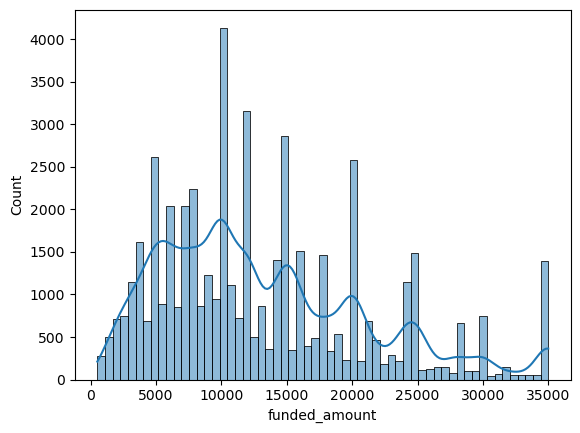

In [19]:
data_plot.plot_histogram(df, "funded_amount")

The data for funded_amount is sufficiently smoothed though it has some spikes. This is the the total amount committed by investors for that loan at that point in time. So there might be some event for those higher deposit. But we can smooth it later. Let's find out mean and median of these column and we will use the median values to fill the missing rows.

In [20]:
dataframe_info.get_df_mean(df, "funded_amount")

mean: 13229.50911682024, median: 12000.0, mode: 10000.0


In [21]:
df = dataframe_transform.fill_null_values_with_median(df, "funded_amount")

In [22]:
len(df["funded_amount"].to_list())

54231

Next "term" column. It has got around 8% data missing and it is a categorical column and has two values. We will remove all the rows that have null values for this column. Also, when we are at it we will remove the word months from the column values and add it to the column name.  

<AxesSubplot:xlabel='term', ylabel='count'>

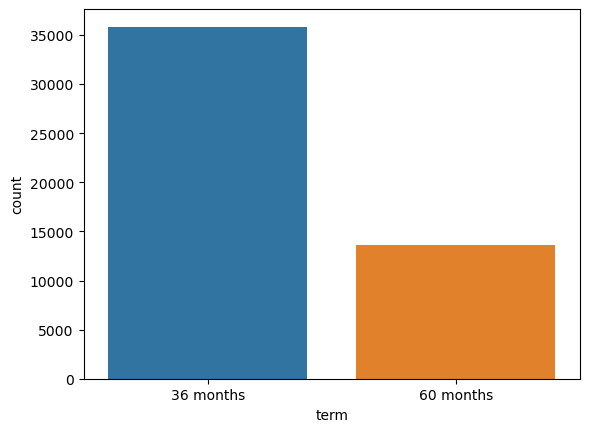

In [23]:
sns.countplot(df, x="term")

In [24]:
df.dropna(subset=['term'], inplace=True)

In [25]:
df.shape

(49459, 39)

In [26]:
df["term"] = df["term"].str.replace("months", "")

In [27]:
df["term"].head()

0    36 
1    36 
2    36 
3    36 
4    36 
Name: term, dtype: object

In [28]:
df = df.rename(columns={"term": "term_in_months"})

In [29]:
df = df.astype({"term_in_months": int}) 

We will next look at "int_rate" column. This also seems like normally distributed from the plot above. We will also impute with median values. 

In [30]:
df = dataframe_transform.fill_null_values_with_median(df, "int_rate")

In [31]:
len(df["int_rate"].to_list())

49459

Next we look at 'employment_length' column. This is categorical data and around 3% data are missing. 

<AxesSubplot:title={'center':'employment_length'}, xlabel='Values', ylabel='Probability'>

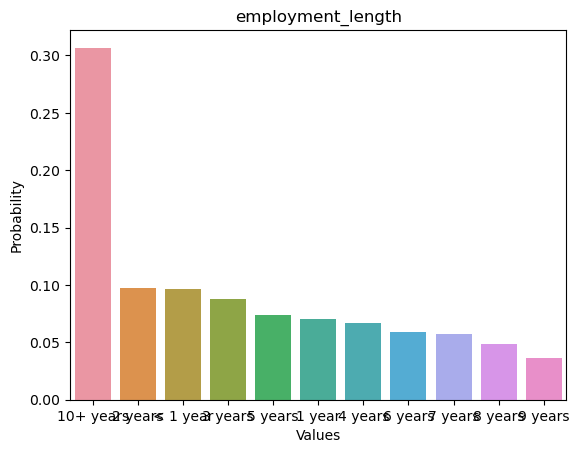

In [32]:
data_plot.plot_prob_distribution(df, "employment_length")

It is probably safe to assume that null values are not randomly distributed. We can check the probablity distribution plot below. So we will fill the missing values with most occuring value which is of employment length of > 10+ years. 

In [33]:
df = dataframe_transform.fill_null_values_with_most_frequent_value(df, "employment_length")

In [34]:
df.shape

(49459, 39)

Lets check the plot again to see if that increases in 10+ years.

<AxesSubplot:title={'center':'employment_length'}, xlabel='Values', ylabel='Probability'>

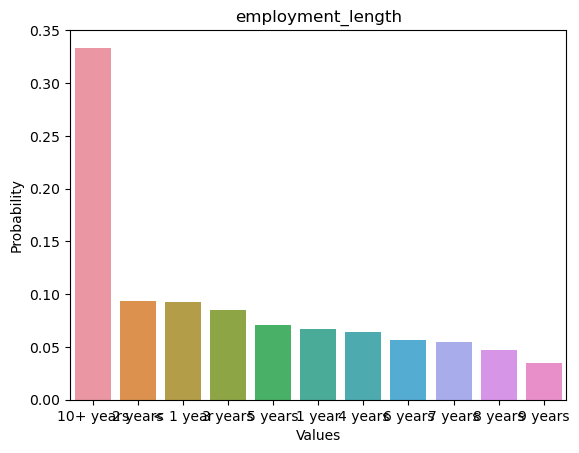

In [35]:
data_plot.plot_prob_distribution(df, "employment_length")

We will also clean the column values by removing years and symbols from it. We will also add 1 to each category so that 0-1 years will be considered as upto 1 years , 1-2 as 2 ans so on. 

In [36]:
df["employment_length"] = df["employment_length"].str.replace("year.*", "").str.replace("< 1", "0").str.replace("+", "").astype(int)

In [37]:
(df["employment_length"].value_counts())

10    16500
2      4614
0      4587
3      4188
5      3512
1      3336
4      3164
6      2800
7      2702
8      2317
9      1739
Name: employment_length, dtype: int64

In [38]:
df["employment_length"] = df["employment_length"] + 1


In [39]:
(df["employment_length"].value_counts())

11    16500
3      4614
1      4587
4      4188
6      3512
2      3336
5      3164
7      2800
8      2702
9      2317
10     1739
Name: employment_length, dtype: int64

Next we will look at column "last_payment_date". This column is a date time column but present in a different format (e.g. May-2021). We will correct the format of this column and the other related columns. There are four remaining columns with same kind of data "last_credit_pull_date", "last_payment_date", "issue_date:" and "earliest_credit_line" (we already dropped "next_payment_date"). 

In [40]:
dt_columns = ["last_credit_pull_date", "last_payment_date", "issue_date","earliest_credit_line",]

In [41]:
df.shape

(49459, 39)

In [42]:
dataframe_info.get_column_type_of_list_of_columns(df, dt_columns)

Type of last_credit_pull_date: object
Type of last_payment_date: object
Type of issue_date: object
Type of earliest_credit_line: object


Now we will change these columns to have proper date time format

In [43]:
df = data_transform.change_date_format(df, column_name="last_credit_pull_date")

In [44]:
df = data_transform.change_date_format(df, column_name="last_payment_date")

In [45]:
df = data_transform.change_date_format(df, column_name="issue_date")

In [46]:
df = data_transform.change_date_format(df, column_name="earliest_credit_line")

Lets check again if the columns have got correct format 

In [47]:
dataframe_info.get_column_type_of_list_of_columns(df, dt_columns)

Type of last_credit_pull_date: datetime64[ns]
Type of last_payment_date: datetime64[ns]
Type of issue_date: datetime64[ns]
Type of earliest_credit_line: datetime64[ns]


We will look at the interval between issue_date and last_payment_date and check if it possible to impute the missing value of last_paymeny_date_column based on that

In [48]:
df[df["last_payment_date"].isna()]["loan_status"].value_counts()

Charged Off                                            61
Does not meet the credit policy. Status:Charged Off     6
Name: loan_status, dtype: int64

We can see that for the rows where the last_payemnt_date is missing the loans have been charged off and a last payemnt date is not avilable. So we can fill these missing dates with place holder date. But that may create some confusions while projecting loss since we will get negative values for remaining terms. So we will drop these missing rows. 

In [49]:
#df = dataframe_transform.fill_null_values_with_custom_value(df, "last_payment_date", "1900-01-01")
df.dropna(subset=['last_payment_date'], inplace=True)

In [50]:
df["last_payment_date"].dtypes

dtype('<M8[ns]')

The othe date tiem column with missing dates is last_credit_pull_date. We will first check the loan status for these loans. 

In [51]:
df[df["last_credit_pull_date"].isna()]["loan_status"].value_counts()

Fully Paid     4
Charged Off    2
Current        1
Name: loan_status, dtype: int64

So there is no apparent trend. For now, we will also impute these missing rows with placeholder date. 

In [52]:
df = dataframe_transform.fill_null_values_with_custom_value(df, "last_credit_pull_date", "1900-01-01")

Last column with missing value is collections_12_mths_ex_med. This is column with floats. Lets plot the column and get more idea. 

In [53]:
df["collections_12_mths_ex_med"].value_counts()

0.0    49151
1.0      179
2.0       13
3.0        1
4.0        1
Name: collections_12_mths_ex_med, dtype: int64

In [54]:
df[df["collections_12_mths_ex_med"].isna()]["loan_status"].value_counts()

Fully Paid                                             22
Does not meet the credit policy. Status:Fully Paid     14
Does not meet the credit policy. Status:Charged Off     8
Charged Off                                             3
Name: loan_status, dtype: int64

<AxesSubplot:title={'center':'collections_12_mths_ex_med'}, xlabel='Values', ylabel='Probability'>

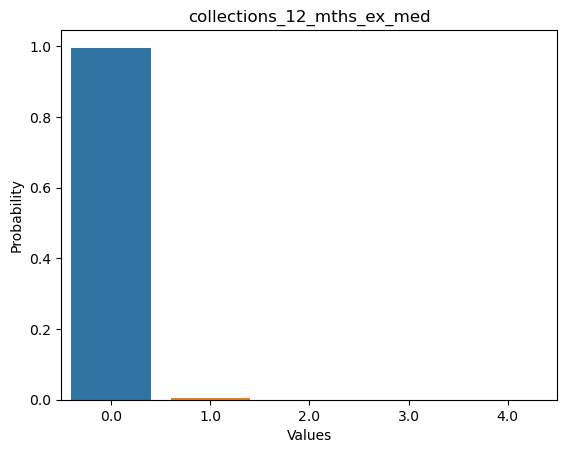

In [55]:
data_plot.plot_prob_distribution(df, "collections_12_mths_ex_med")

Looking at this probability distribution, we will fill the missing rows with 0. 

In [56]:
df = dataframe_transform.fill_null_values_with_most_frequent_value(df, "collections_12_mths_ex_med")

In [57]:
df.shape

(49392, 39)

## Check for skewness

### Numerical columns

Let's list all the numeric column again 

In [58]:
df.skew(numeric_only=True)


id                             2.362128
member_id                      2.198504
loan_amount                    0.803140
funded_amount                  0.868848
funded_amount_inv              0.812875
term_in_months                 1.005769
int_rate                       0.454911
instalment                     0.994417
employment_length             -0.187557
annual_inc                     8.553904
dti                            0.191423
delinq_2yrs                    5.344740
inq_last_6mths                 3.014551
open_accounts                  1.055242
total_accounts                 0.774619
out_prncp                      2.356451
out_prncp_inv                  2.356860
total_payment                  1.272202
total_payment_inv              1.261628
total_rec_prncp                1.262142
total_rec_int                  2.205425
total_rec_late_fee            13.504201
recoveries                    14.234821
collection_recovery_fee       27.851987
last_payment_amount            2.489630


In [59]:
df_copy = df.copy()

In [60]:
#for column in dataframe_info.list_all_numeric_columns(df_copy):
#    if column not in ["id", "member_id", "policy_code"]:
#        if df_copy[column].skew() > 1.0 or df_copy[column].skew() < -1.0:
#            print(f"column {column} has skew of {df_copy[column].skew()}")
#            df_copy = dataframe_transform.get_log_transform(df_copy, column)   
#            print(f"column {column} has skew of {df_copy[column].skew()}") 


In [61]:
df_copy["collections_12_mths_ex_med"].value_counts()

0.0    49198
1.0      179
2.0       13
3.0        1
4.0        1
Name: collections_12_mths_ex_med, dtype: int64

In [62]:
df_copy["collections_12_mths_ex_med"].value_counts()

0.0    49198
1.0      179
2.0       13
3.0        1
4.0        1
Name: collections_12_mths_ex_med, dtype: int64

In [63]:
df_copy_filtered = df_copy.loc[df_copy["collections_12_mths_ex_med"] == 0]

In [64]:
df_copy_filtered.shape


(49198, 39)

<AxesSubplot:>

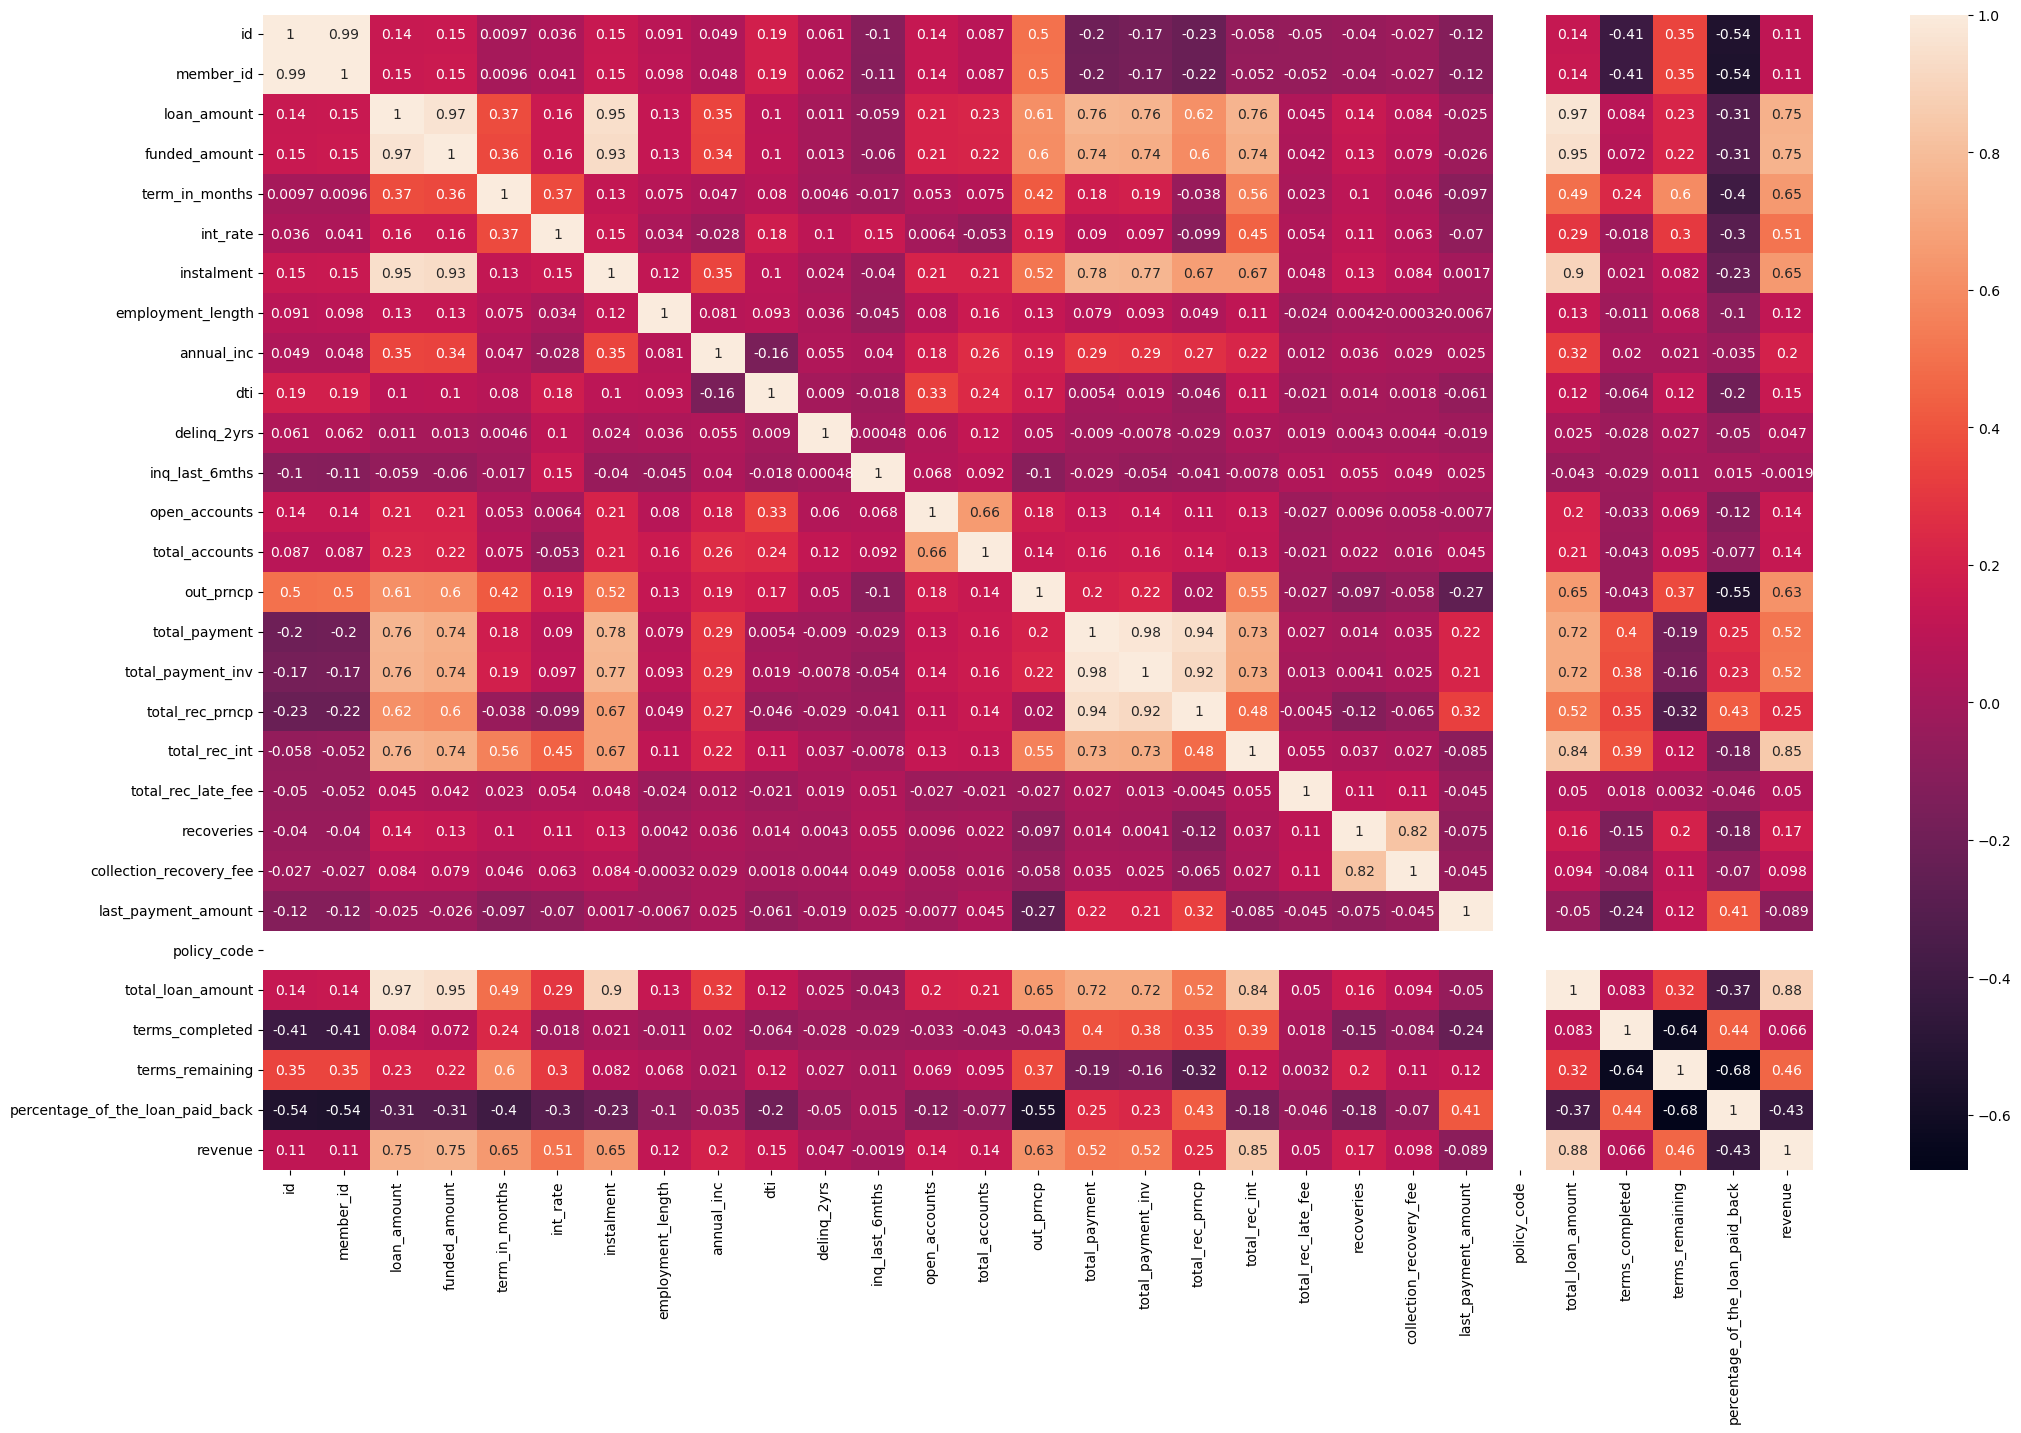

In [185]:
corr_matrix = df_copy_filtered[dataframe_info.list_all_numeric_columns(df_copy_filtered)].corr()
sns.heatmap(corr_matrix, annot=True)

From this we can see columns "out_prncp" and "out_prncp_inv" and "funded_amonut" and "funded_amount_inv" are highly correlated (value over 0.9). We will  drop "collections_12_mths_ex_med" since that column does not look like have any effect on the outcome. We also can delete one of the columns between "id" and "memner_id" but we will do that later depending on which one we would be using.

In [66]:
df_copy_filtered.drop(columns=["collections_12_mths_ex_med", "out_prncp_inv", "funded_amount_inv"], inplace=True)

In [67]:
df_copy_filtered.shape

(49198, 36)

## Handling of outliers


### Categorical columns

In [68]:
list_of_categorical_columns = dataframe_info.list_all_categorical_columns(df_copy_filtered)
list_of_categorical_columns

['grade',
 'sub_grade',
 'home_ownership',
 'verification_status',
 'loan_status',
 'payment_plan',
 'purpose',
 'application_type']

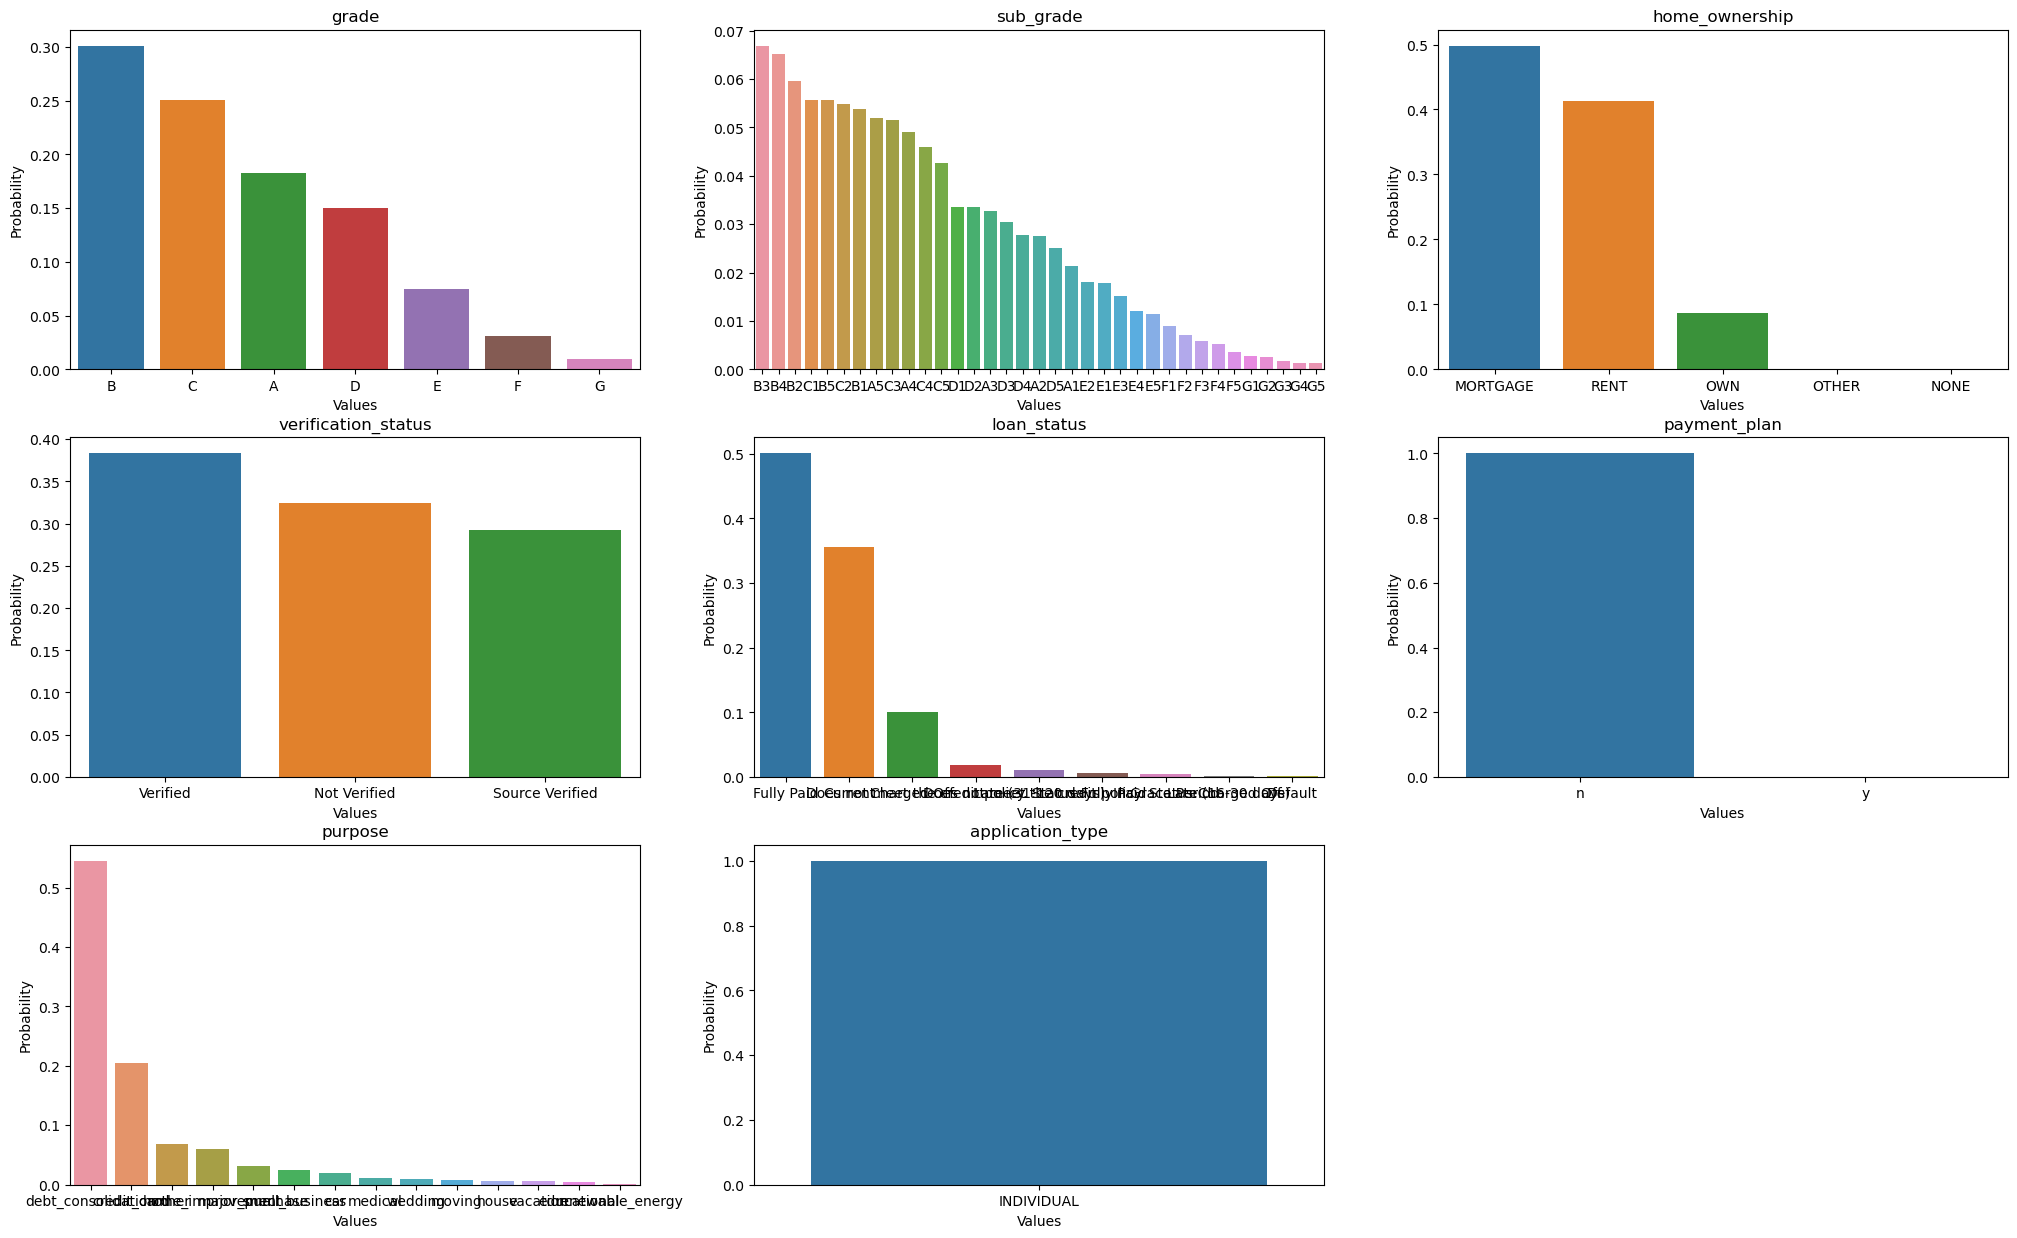

In [69]:
for i, column in enumerate(df_copy_filtered[list_of_categorical_columns], 1):
    plt.rcParams["figure.figsize"] = (25,15)
    plt.subplot(3,3,i)
    data_plot.plot_prob_distribution(df_copy_filtered, column)


The categorical column looks fine. We will leave these columsn for now as it is. 

### Numerical columns

In [70]:
print(len(dataframe_info.list_all_numeric_columns(df_copy_filtered)))

24


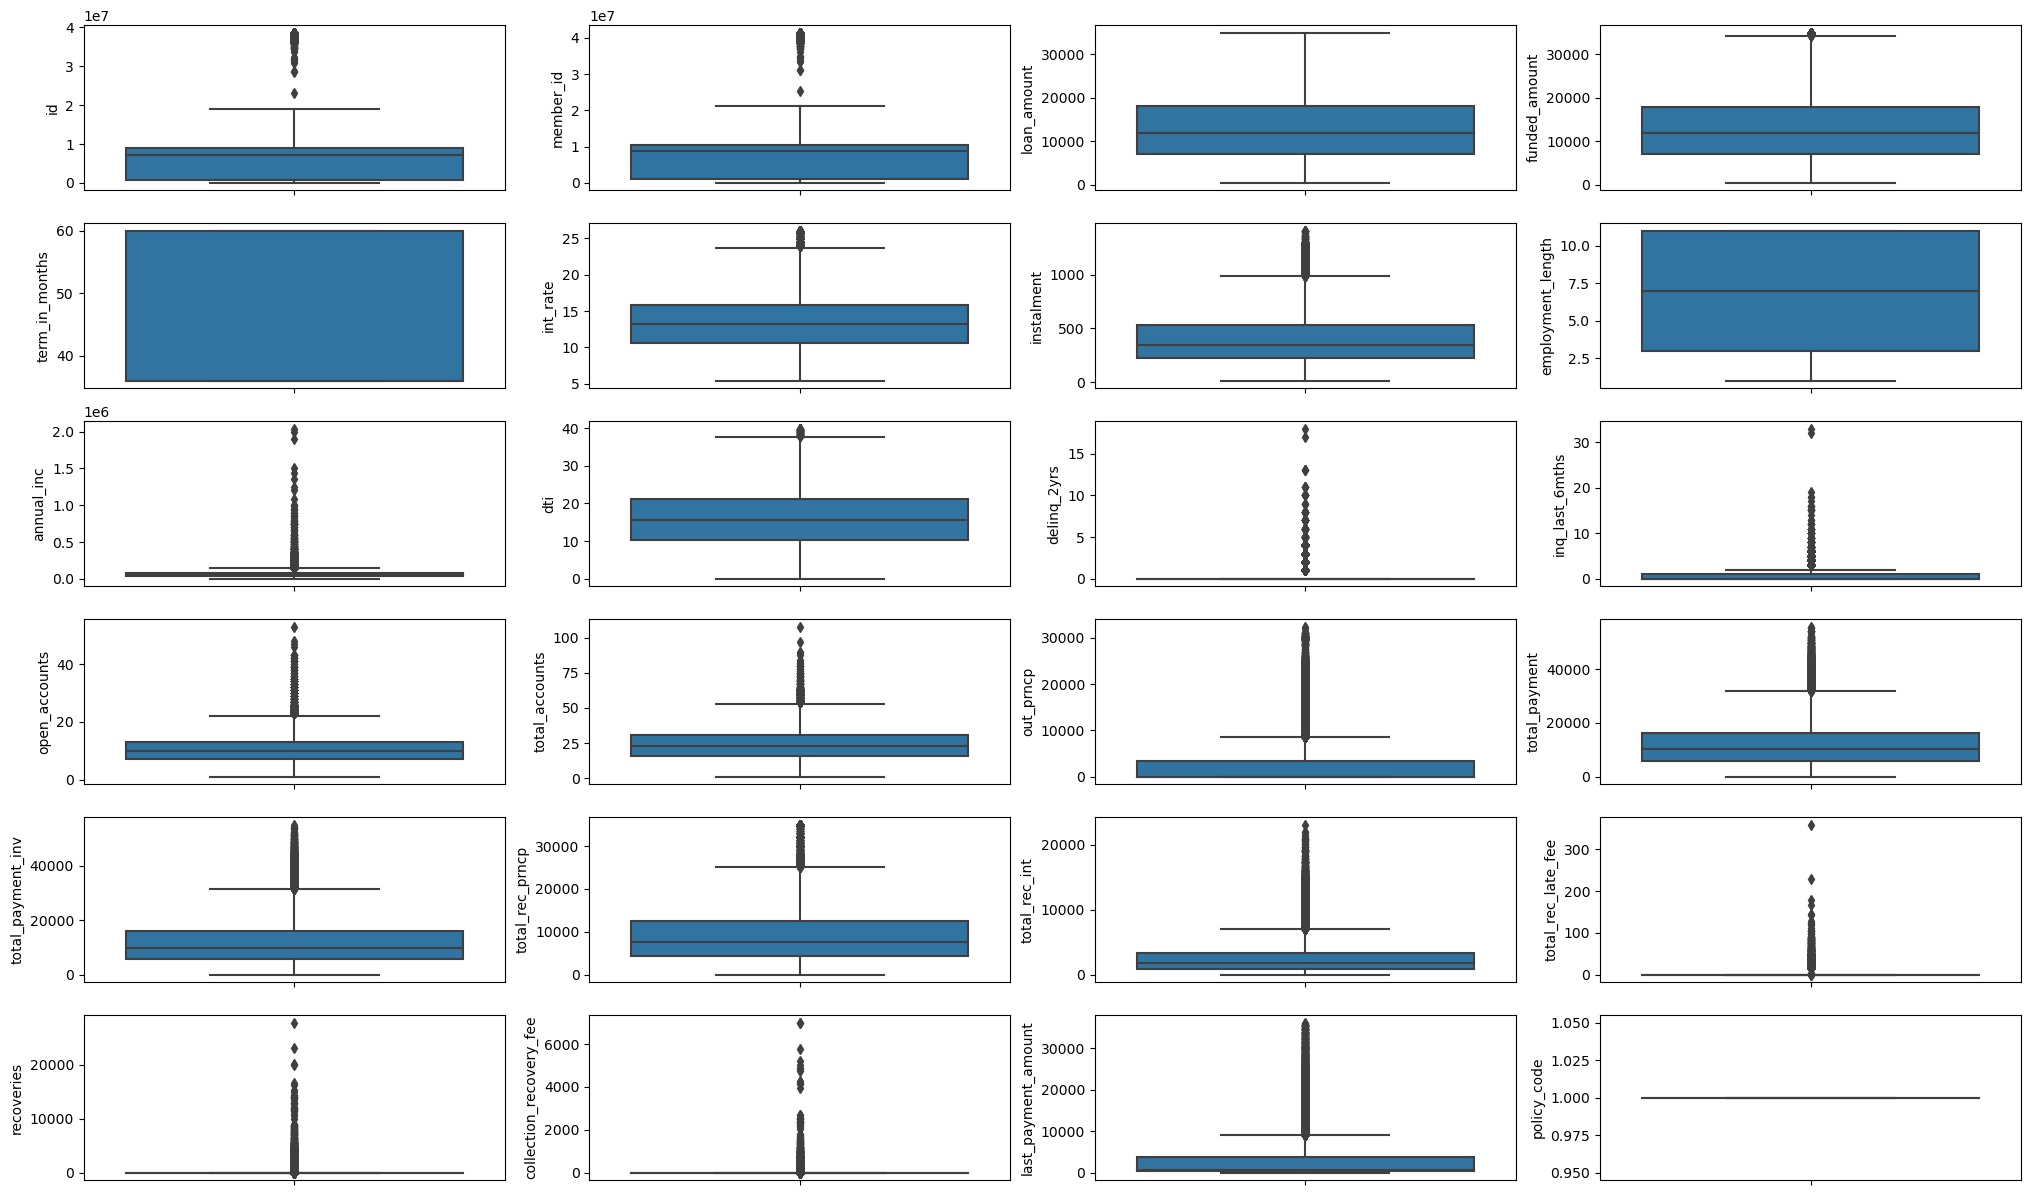

In [71]:
for i, column in enumerate(df_copy_filtered[dataframe_info.list_all_numeric_columns(df_copy_filtered)], 1):
    plt.rcParams["figure.figsize"] = (25,15)
    plt.subplot(6,4,i)
    sns.boxplot(data = df_copy_filtered, y = column)


There are some negative values in columns "total_rec_late_fee", "total_payment_inv", "recoveries", "collection_recovery_fee" and "last_payment_account". This is not possible and clearly a mistake so we will remove those values from these columns. 

In [72]:
for column in ["total_rec_late_fee", "total_payment_inv", "recoveries", "collection_recovery_fee", "last_payment_amount"]:

    df_copy_filtered = df_copy_filtered.loc[df_copy_filtered[column] >= 0]

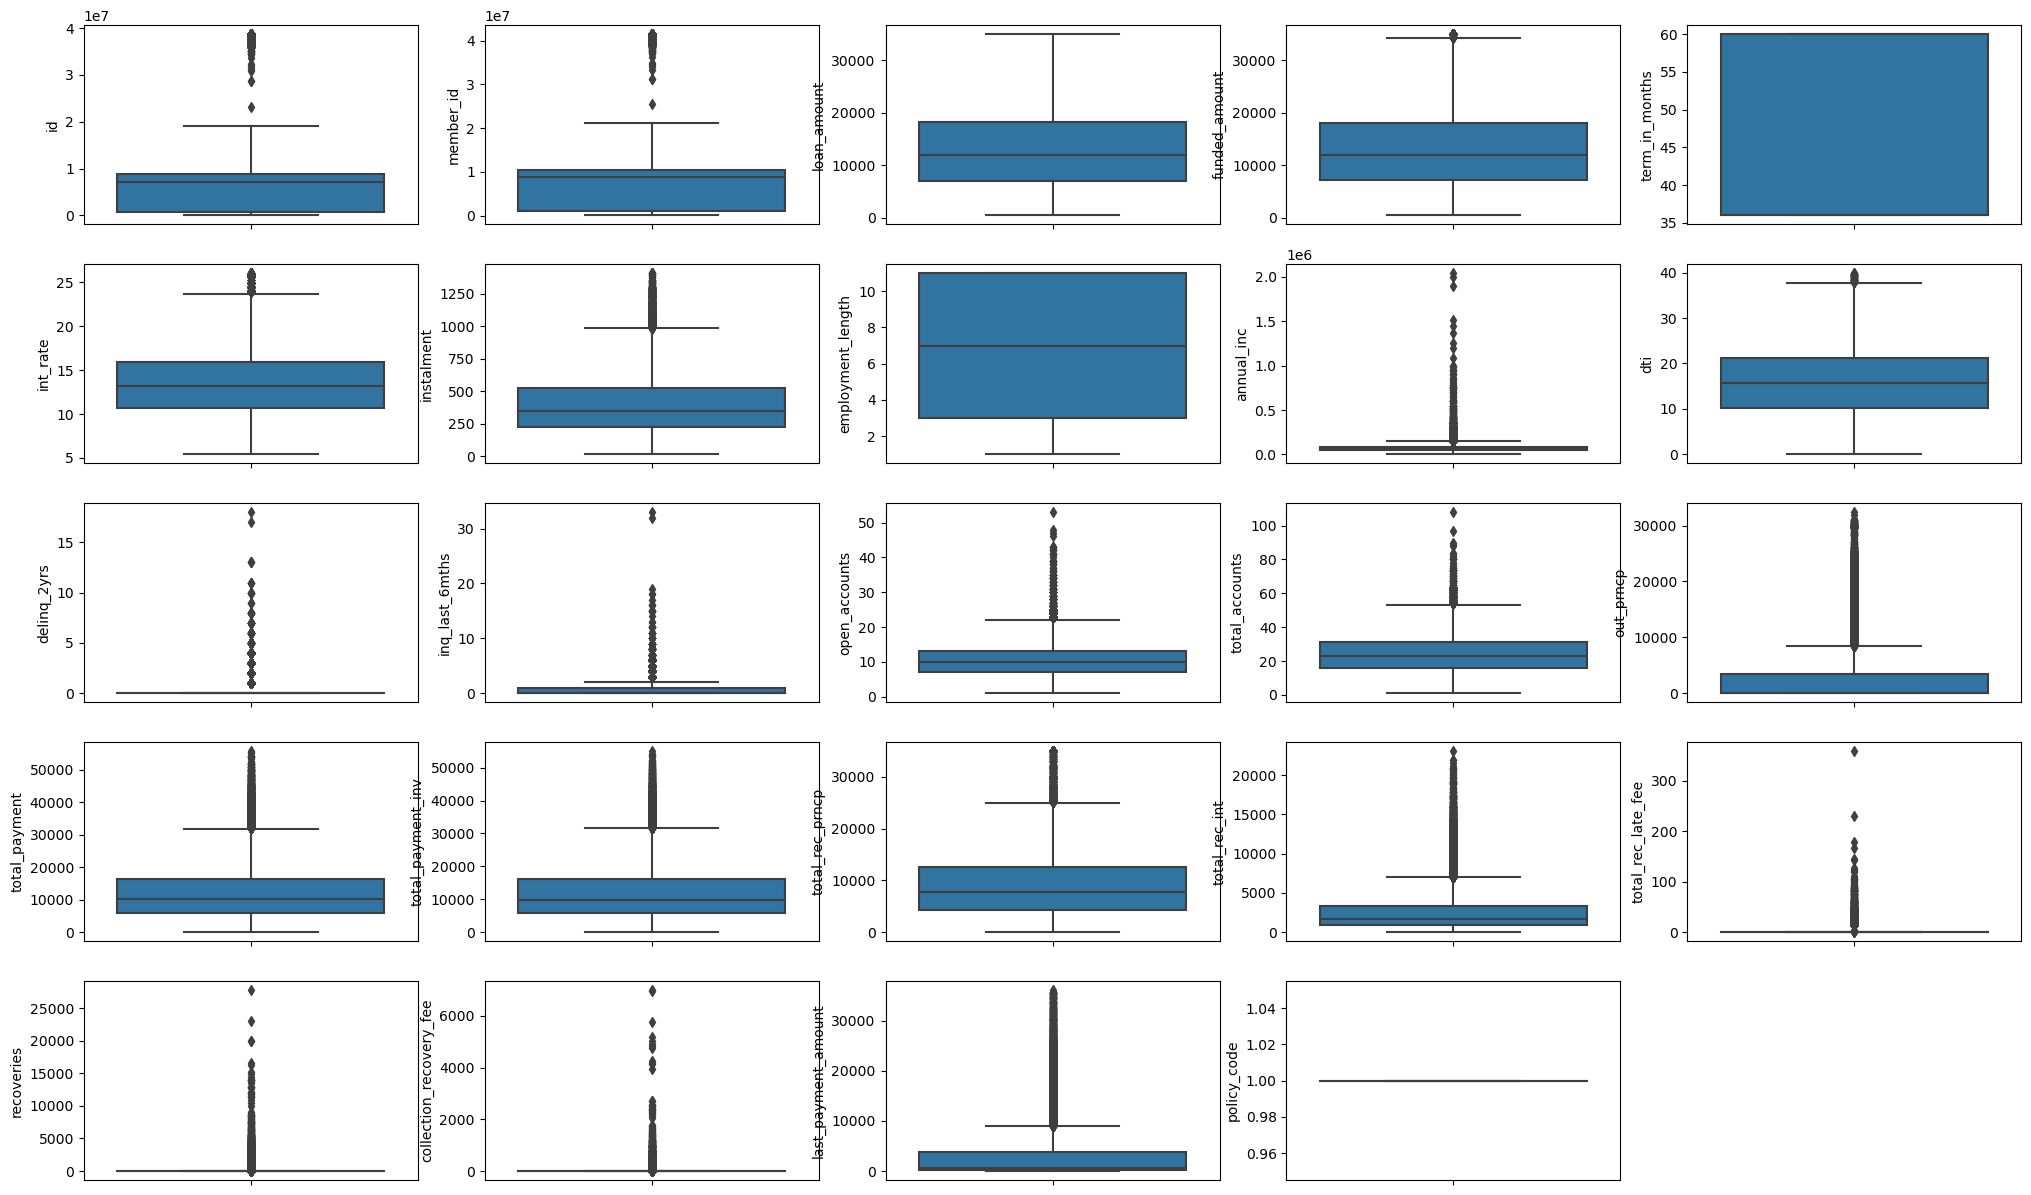

In [73]:
for i, column in enumerate(df_copy_filtered[dataframe_info.list_all_numeric_columns(df_copy_filtered)], 1):
    plt.rcParams["figure.figsize"] = (25,15)
    plt.subplot(5,5,i)
    sns.boxplot(data = df_copy_filtered, y = column)


In [74]:

#for column in ["int_rate", "dti", "open_accounts", "last_payment_amount"]:
#    
#    Q1 = df_copy_filterd[column].quantile(0.25)
#    Q3 = df_copy_filterd[column].quantile(0.75)
#    IQR = Q3 - Q1    #IQR is interquartile range. #

#    filter = df_copy_filterd[(df_copy_filterd[column] < Q1 - 1.5 * IQR)  | (df_copy_filterd[column] > Q3 + 1.5 *IQR)]
#    df_copy_filterd =  df_copy_filterd.drop(filter.index)

In [75]:
for column in ["int_rate", "dti", "open_accounts", "last_payment_amount"]:
    outliers = dataframe_info.calculate_iqr_outliers(df_copy_filtered, column)
    df_copy_filtered =  df_copy_filtered.drop(outliers.index)


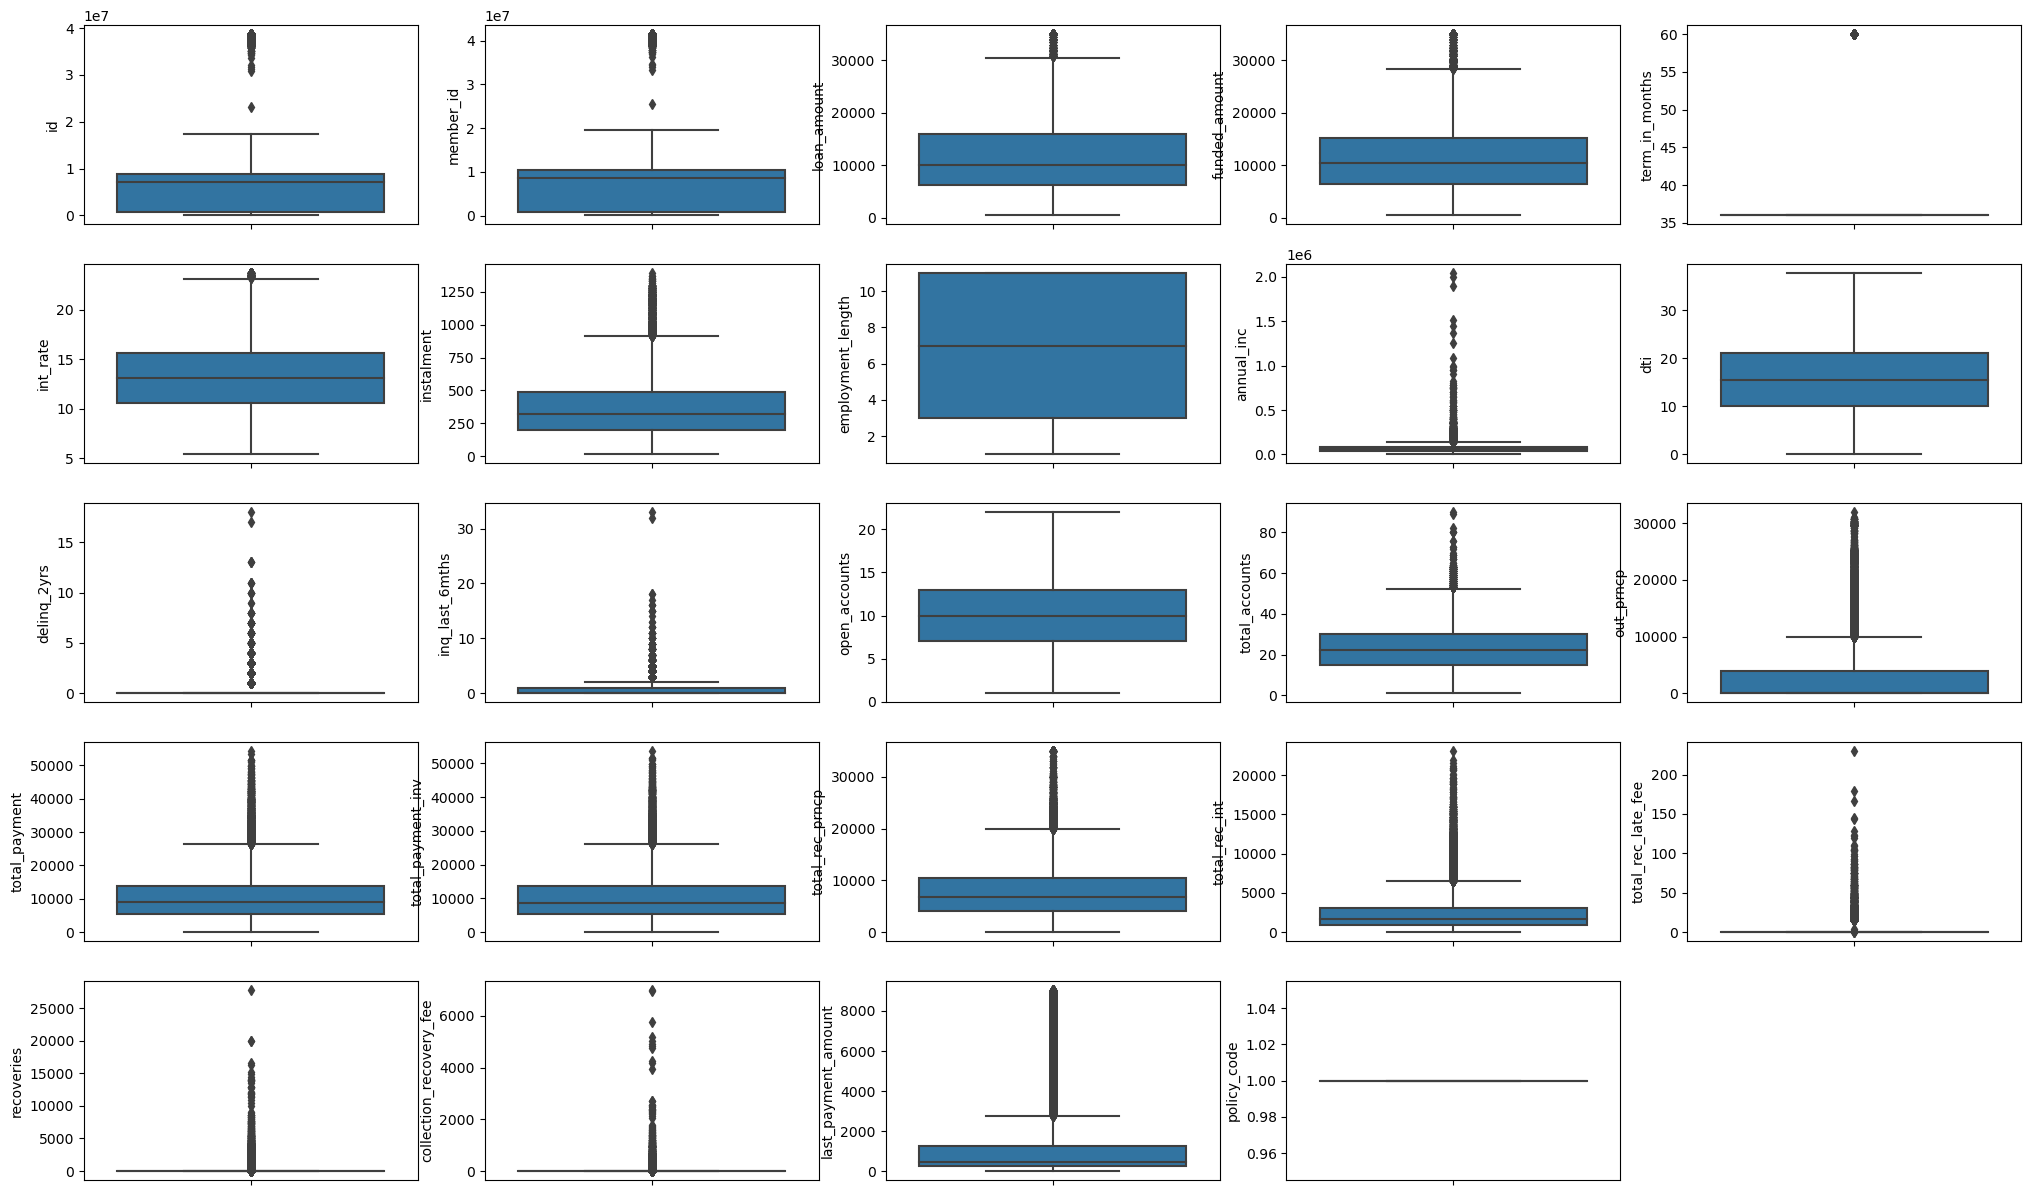

In [76]:
for i, column in enumerate(df_copy_filtered[dataframe_info.list_all_numeric_columns(df_copy_filtered)], 1):
    plt.rcParams["figure.figsize"] = (25,15)
    plt.subplot(5,5,i)
    sns.boxplot(data = df_copy_filtered, y = column)

## Data analysis and visualisation

Let's have a look at the data again 

In [77]:
df_copy_filtered.head(10)

id  member_id  loan_amount  funded_amount  term_in_months  int_rate  \
0   38676116   41461848         8000         8000.0              36      7.49   
1   38656203   41440010        13200        13200.0              36      6.99   
5   38656111   41439917         2525         2525.0              36     11.44   
8   38656063   41439868        10000        10000.0              60     12.99   
9   38656052   41439857        10000        12000.0              36      8.19   
10  38656023   41439828         7200         7200.0              36      8.19   
11  38656004   41439809         2000         2000.0              36     10.49   
12  38656003   41439808         6000         6000.0              36     12.39   
14  38655931   41439735         7675         7675.0              36     13.66   
15  38655925   41439729        12000        12000.0              36     13.16   

    instalment grade sub_grade  employment_length home_ownership  annual_inc  \
0       248.82     A        A4                  6       MORTGAGE     46000.0   
1       407.52     A        A3                 10           RENT     50000.0   
5        83.20     B        B4                  1            OWN     32000.0   
8       227.48     C        C2                  1           RENT     50048.0   
9       314.25     A        A5                 11       MORTGAGE    103000.0   
10      226.26     A        A5                  8            OWN     87000.0   
11       65.00     B        B3                 11           RENT     71000.0   
12      200.41     C        C1                  1       MORTGAGE    102000.0   
14      261.05     C        C3                 11            OWN     22000.0   
15      377.09     A        A5                 11       MORTGAGE     47256.0   

   verification_status issue_date loan_status payment_plan  \
0         Not Verified 2021-01-01     Current            n   
1         Not Verified 2021-01-01     Current            n   
5      Source Verified 2021-01-01     Current            n   
8      Source Verified 2021-01-01     Current            n   
9         Not Verified 2021-01-01     Current            n   
10        Not Verified 2021-01-01     Current            n   
11        Not Verified 2021-01-01     Current            n   
12            Verified 2021-01-01     Current            n   
14            Verified 2021-01-01     Current            n   
15            Verified 2021-01-01     Current            n   

               purpose    dti  delinq_2yrs earliest_credit_line  \
0          credit_card  19.54            2           1987-10-01   
1          credit_card  24.20            0           2001-09-01   
5     home_improvement   6.60            1           2011-03-01   
8          credit_card  20.67            0           2005-11-01   
9          credit_card  15.95            0           2002-02-01   
10    home_improvement  14.41            0           1996-03-01   
11  debt_consolidation  25.54            0           1999-01-01   
12  debt_consolidation  20.20            3           2003-04-01   
14  debt_consolidation  20.57            0           1981-10-01   
15  debt_consolidation  32.15            0           1995-11-01   

    inq_last_6mths  open_accounts  total_accounts  out_prncp  total_payment  \
0                1             12              27    5529.70        2982.51   
1                0             15              31    9102.83        4885.11   
5                0              3               4    1842.68         913.60   
8                0              8              11    8480.91        2722.54   
9                1             14              35    6934.63        3766.45   
10               0             12              35    4992.93        2711.84   
11               0             11              19    1401.57         778.83   
12               1              9              51    4240.81        2402.45   
14               0             12              26    5455.24        3126.78   
15               0        

### Task-1: Current state of the loans
Summarise what percentage of the loans are paid back compared to the total payment expected with interest, and get a prediction for 6months into the future. 

In [78]:
df_copy_filtered.shape

(41676, 36)

In [79]:
df_copy_filtered.columns

Index(['id', 'member_id', 'loan_amount', 'funded_amount', 'term_in_months',
       'int_rate', 'instalment', 'grade', 'sub_grade', 'employment_length',
       'home_ownership', 'annual_inc', 'verification_status', 'issue_date',
       'loan_status', 'payment_plan', 'purpose', 'dti', 'delinq_2yrs',
       'earliest_credit_line', 'inq_last_6mths', 'open_accounts',
       'total_accounts', 'out_prncp', 'total_payment', 'total_payment_inv',
       'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries',
       'collection_recovery_fee', 'last_payment_date', 'last_payment_amount',
       'last_credit_pull_date', 'policy_code', 'application_type'],
      dtype='object')

We will create a function to calculate the total loan amount.

In [80]:
def total_loan_amaount(instalment: float, term: int)->  float:
    return round((instalment * term), 2)

Now we will create a column that will have the total loan amount that clients are supposed to pay (with interest)

In [81]:
df_copy_filtered["total_loan_amount"] = df_copy_filtered.apply(lambda x: total_loan_amaount(x["instalment"], int(x["term_in_months"])), axis=1)

We will create another column to capture how many months each loan completed from their issue date and last payment date.

In [82]:
df_copy_filtered["terms_completed"] =((df_copy_filtered["last_payment_date"] - df_copy_filtered["issue_date"]).dt.days / 30).astype(int)

Column terms remaining will have the information how many months are still remaining in each loan.

In [83]:
df_copy_filtered["terms_remaining"] = df_copy_filtered["term_in_months"] - df_copy_filtered["terms_completed"]

<AxesSubplot:xlabel='terms_remaining', ylabel='Count'>

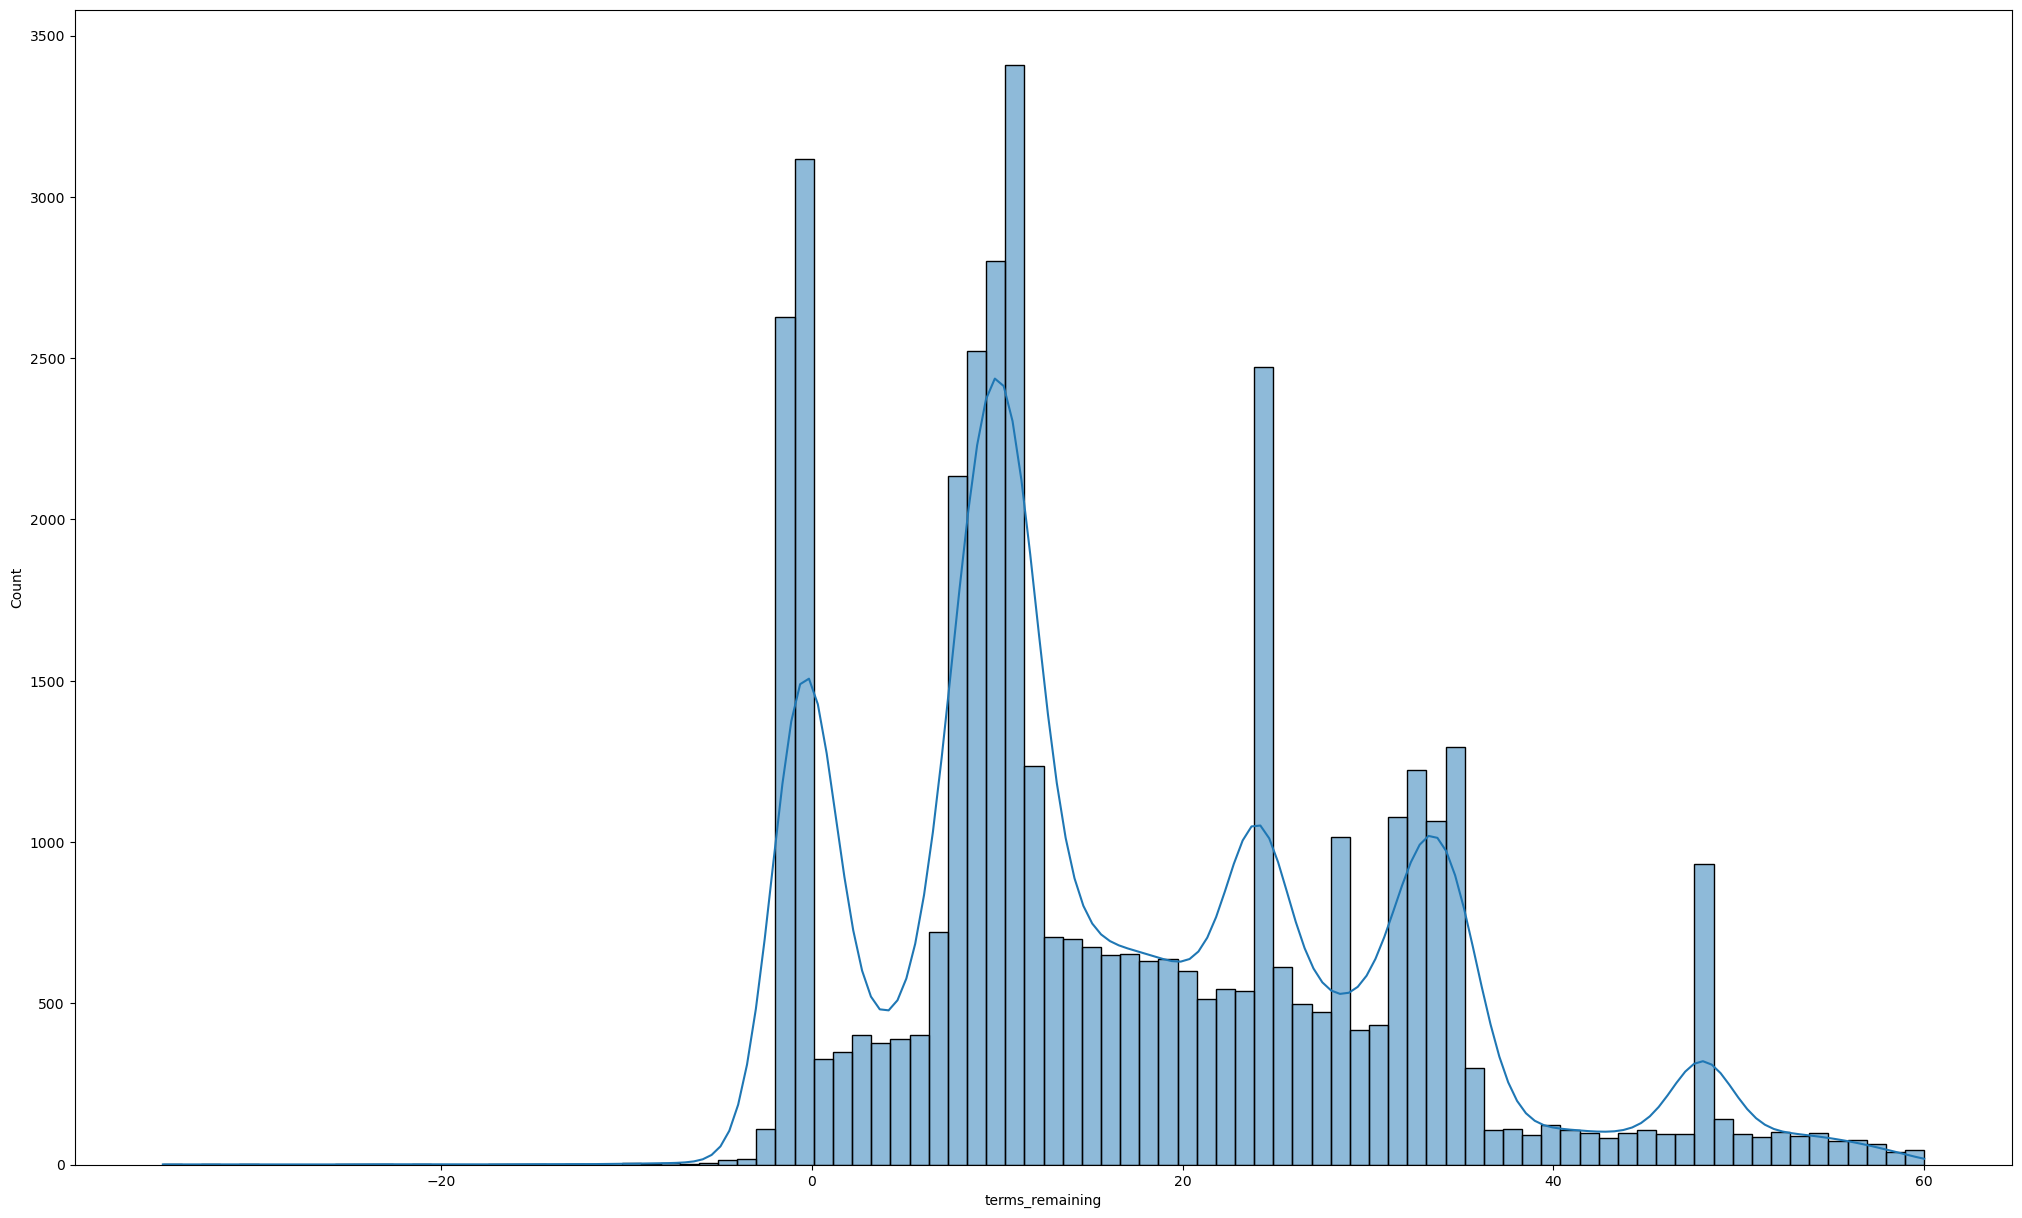

In [120]:
data_plot.plot_histogram(df_copy_filtered, "terms_remaining")

"term_remaining" column has some negative values. This must be result of worng data entry error in issue date and last payment date. So we ll remove all the rows with negative values.

In [121]:
df_copy_filtered = df_copy_filtered[df_copy_filtered["terms_remaining"] >= 0]

We will create another column where we will store for each loan what percentage of the loan has been paid.

In [123]:
df_copy_filtered["percentage_of_the_loan_paid_back"] =  round(((df_copy_filtered["total_payment"]/df_copy_filtered["total_loan_amount"]) * 100) , 2)

Let's have a look at few rows of teh data frame to check the columns we just created. 

In [124]:
df_copy_filtered.head(5)

id  member_id  loan_amount  funded_amount  term_in_months  int_rate  \
0  38676116   41461848         8000         8000.0              36      7.49   
1  38656203   41440010        13200        13200.0              36      6.99   
5  38656111   41439917         2525         2525.0              36     11.44   
8  38656063   41439868        10000        10000.0              60     12.99   
9  38656052   41439857        10000        12000.0              36      8.19   

   instalment grade sub_grade  employment_length home_ownership  annual_inc  \
0      248.82     A        A4                  6       MORTGAGE     46000.0   
1      407.52     A        A3                 10           RENT     50000.0   
5       83.20     B        B4                  1            OWN     32000.0   
8      227.48     C        C2                  1           RENT     50048.0   
9      314.25     A        A5                 11       MORTGAGE    103000.0   

  verification_status issue_date loan_status payment_plan           purpose  \
0        Not Verified 2021-01-01     Current            n       credit_card   
1        Not Verified 2021-01-01     Current            n       credit_card   
5     Source Verified 2021-01-01     Current            n  home_improvement   
8     Source Verified 2021-01-01     Current            n       credit_card   
9        Not Verified 2021-01-01     Current            n       credit_card   

     dti  delinq_2yrs earliest_credit_line  inq_last_6mths  open_accounts  \
0  19.54            2           1987-10-01               1             12   
1  24.20            0           2001-09-01               0             15   
5   6.60            1           2011-03-01               0              3   
8  20.67            0           2005-11-01               0              8   
9  15.95            0           2002-02-01               1             14   

   total_accounts  out_prncp  total_payment  total_payment_inv  \
0              27    5529.70        2982.51            2982.51   
1              31    9102.83        4885.11            4885.11   
5               4    1842.68         913.60             913.60   
8              11    8480.91        2722.54            2722.54   
9              35    6934.63        3766.45            3766.45   

   total_rec_prncp  total_rec_int  total_rec_late_fee  recoveries  \
0          2470.30         512.21                 0.0         0.0   
1          4097.17         787.94                 0.0         0.0   
5           682.32         231.28                 0.0         0.0   
8          1519.09        1203.45                 0.0         0.0   
9          3065.37         701.08                 0.0         0.0   

   collection_recovery_fee last_payment_date  last_payment_amount  \
0                      0.0        2022-01-01               248.82   
1                      0.0        2022-01-01               407.52   
5                      0.0        2022-01-01                91.39   
8                      0.0        2022-01-01               227.48   
9                      0.0        2022-01-01               314.25   

  last_credit_pull_date  policy_code application_type  total_loan_amount  \
0            2022-01-01            1       INDIVIDUAL            8957.52   
1            2022-01-01            1       INDIVIDUAL           14670.72   
5            2022-01-01            1       INDIVIDUAL            2995.20   
8            2022-01-01            1       INDIVIDUAL           13648.80   
9            2022-01-01            1       INDIVIDUAL           11313.00   

   terms_completed  terms_remaining  percentage_of_the_loan_paid_back  
0               12               24                             33.30  
1               12               24                             33.30  
5               12               24                             30.50  
8               12               48                             19.95  
9               12               24                             33.29

Next we plot what percentage of the loans have been paid back.

Text(0.5, 0, 'Percentage of the loan paid back')

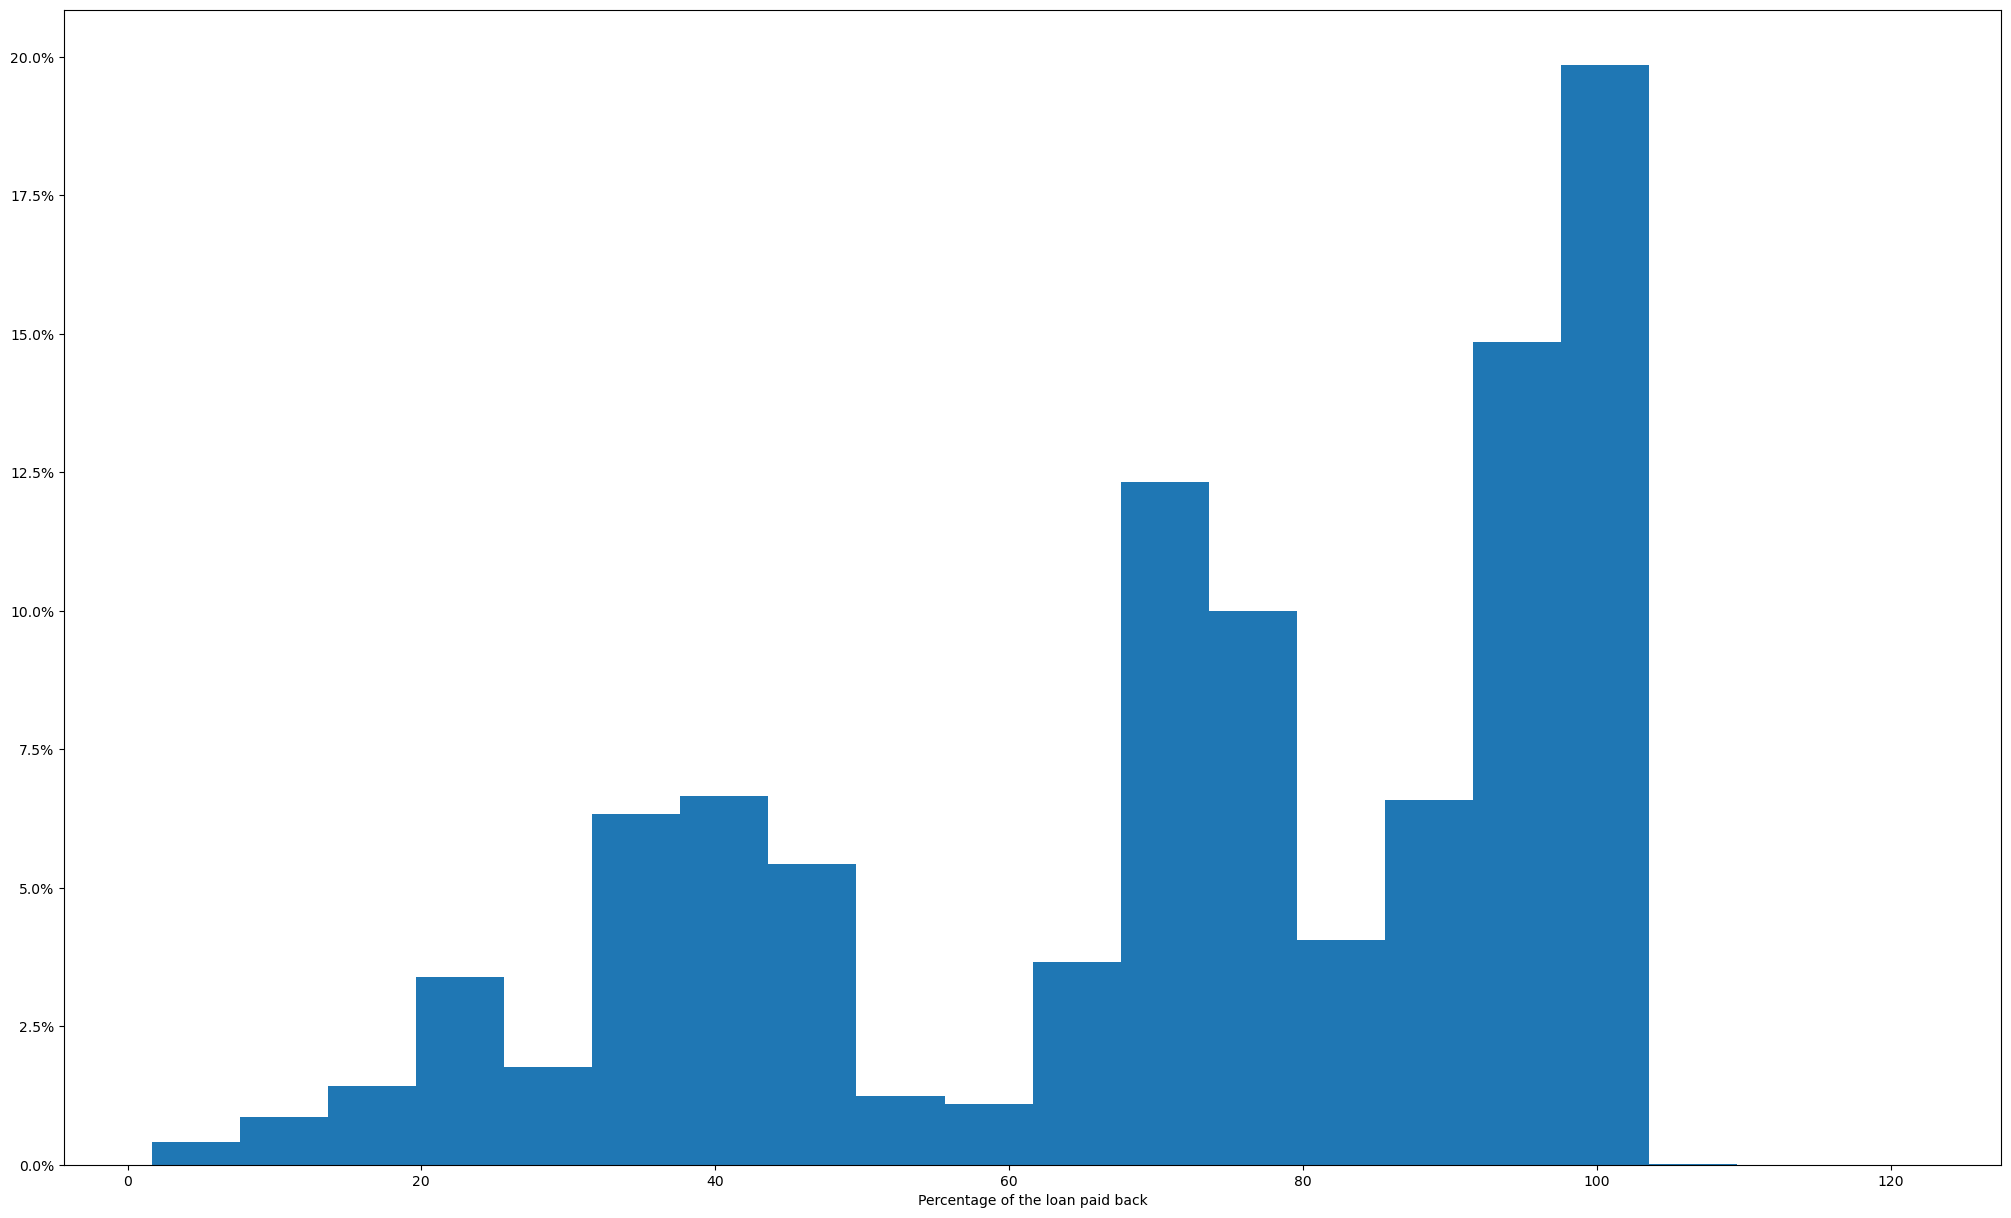

In [125]:
from matplotlib.ticker import PercentFormatter

plt.hist(df_copy_filtered["percentage_of_the_loan_paid_back"], weights=np.ones(len(df_copy_filtered["percentage_of_the_loan_paid_back"])) / len(df_copy_filtered["percentage_of_the_loan_paid_back"]), bins=20)
plt.gca().yaxis.set_major_formatter(PercentFormatter(1))
plt.xlabel("Percentage of the loan paid back")


From this we can see that 25% of the loans have been paid back in full.

In [126]:
df_copy_filtered["loan_status"].value_counts()

Current                                                16627
Fully Paid                                             15795
Charged Off                                             4674
Does not meet the credit policy. Status:Fully Paid       637
Late (31-120 days)                                       469
Does not meet the credit policy. Status:Charged Off      318
In Grace Period                                          225
Late (16-30 days)                                         84
Default                                                   45
Name: loan_status, dtype: int64

Now we will create a new data frame with all the loans that are active i.e. where loan status is "current", "Late (31-120 days)", "In Grace Period and Late (16-30 days)".

In [127]:
#active_df = df_copy_filtered.loc[(df_copy_filtered["loan_status"] == "Current") & 
#                                 (df_copy_filtered["loan_status"].str.contains("Late")) &
#                                 (df_copy_filtered["loan_status"] == "In Grace Period")]
# check why these code block returns empty dataframe

In [128]:
active_df = df_copy_filtered[df_copy_filtered["loan_status"].str.contains("Current")]

In [129]:
active_df.shape    

(16627, 40)

In [130]:
active_df["loan_status"].value_counts()

Current    16627
Name: loan_status, dtype: int64

To get 6 months projection we will create an extra column with 6 months added to completed terms.

In [131]:
active_df["term_completed_in_6_months"] = active_df["terms_completed"].apply(lambda x: x + 6)

In [132]:
active_df.head(1)

id  member_id  loan_amount  funded_amount  term_in_months  int_rate  \
0  38676116   41461848         8000         8000.0              36      7.49   

   instalment grade sub_grade  employment_length home_ownership  annual_inc  \
0      248.82     A        A4                  6       MORTGAGE     46000.0   

  verification_status issue_date loan_status payment_plan      purpose    dti  \
0        Not Verified 2021-01-01     Current            n  credit_card  19.54   

   delinq_2yrs earliest_credit_line  inq_last_6mths  open_accounts  \
0            2           1987-10-01               1             12   

   total_accounts  out_prncp  total_payment  total_payment_inv  \
0              27     5529.7        2982.51            2982.51   

   total_rec_prncp  total_rec_int  total_rec_late_fee  recoveries  \
0           2470.3         512.21                 0.0         0.0   

   collection_recovery_fee last_payment_date  last_payment_amount  \
0                      0.0        2022-01-01               248.82   

  last_credit_pull_date  policy_code application_type  total_loan_amount  \
0            2022-01-01            1       INDIVIDUAL            8957.52   

   terms_completed  terms_remaining  percentage_of_the_loan_paid_back  \
0               12               24                              33.3   

   term_completed_in_6_months  
0                          18

In [133]:
active_df["amount_paid_in_6_months"] = active_df.apply(lambda x: total_loan_amaount(x["instalment"], int(x["term_completed_in_6_months"])), axis=1)   

In [134]:
active_df["percentage_of_the_loan_paid_back_in_6_months"] =  round(((active_df["amount_paid_in_6_months"]/active_df["total_loan_amount"]) * 100) , 2)

Text(0.5, 0, 'Percentage of the loan paid back in 6 months')

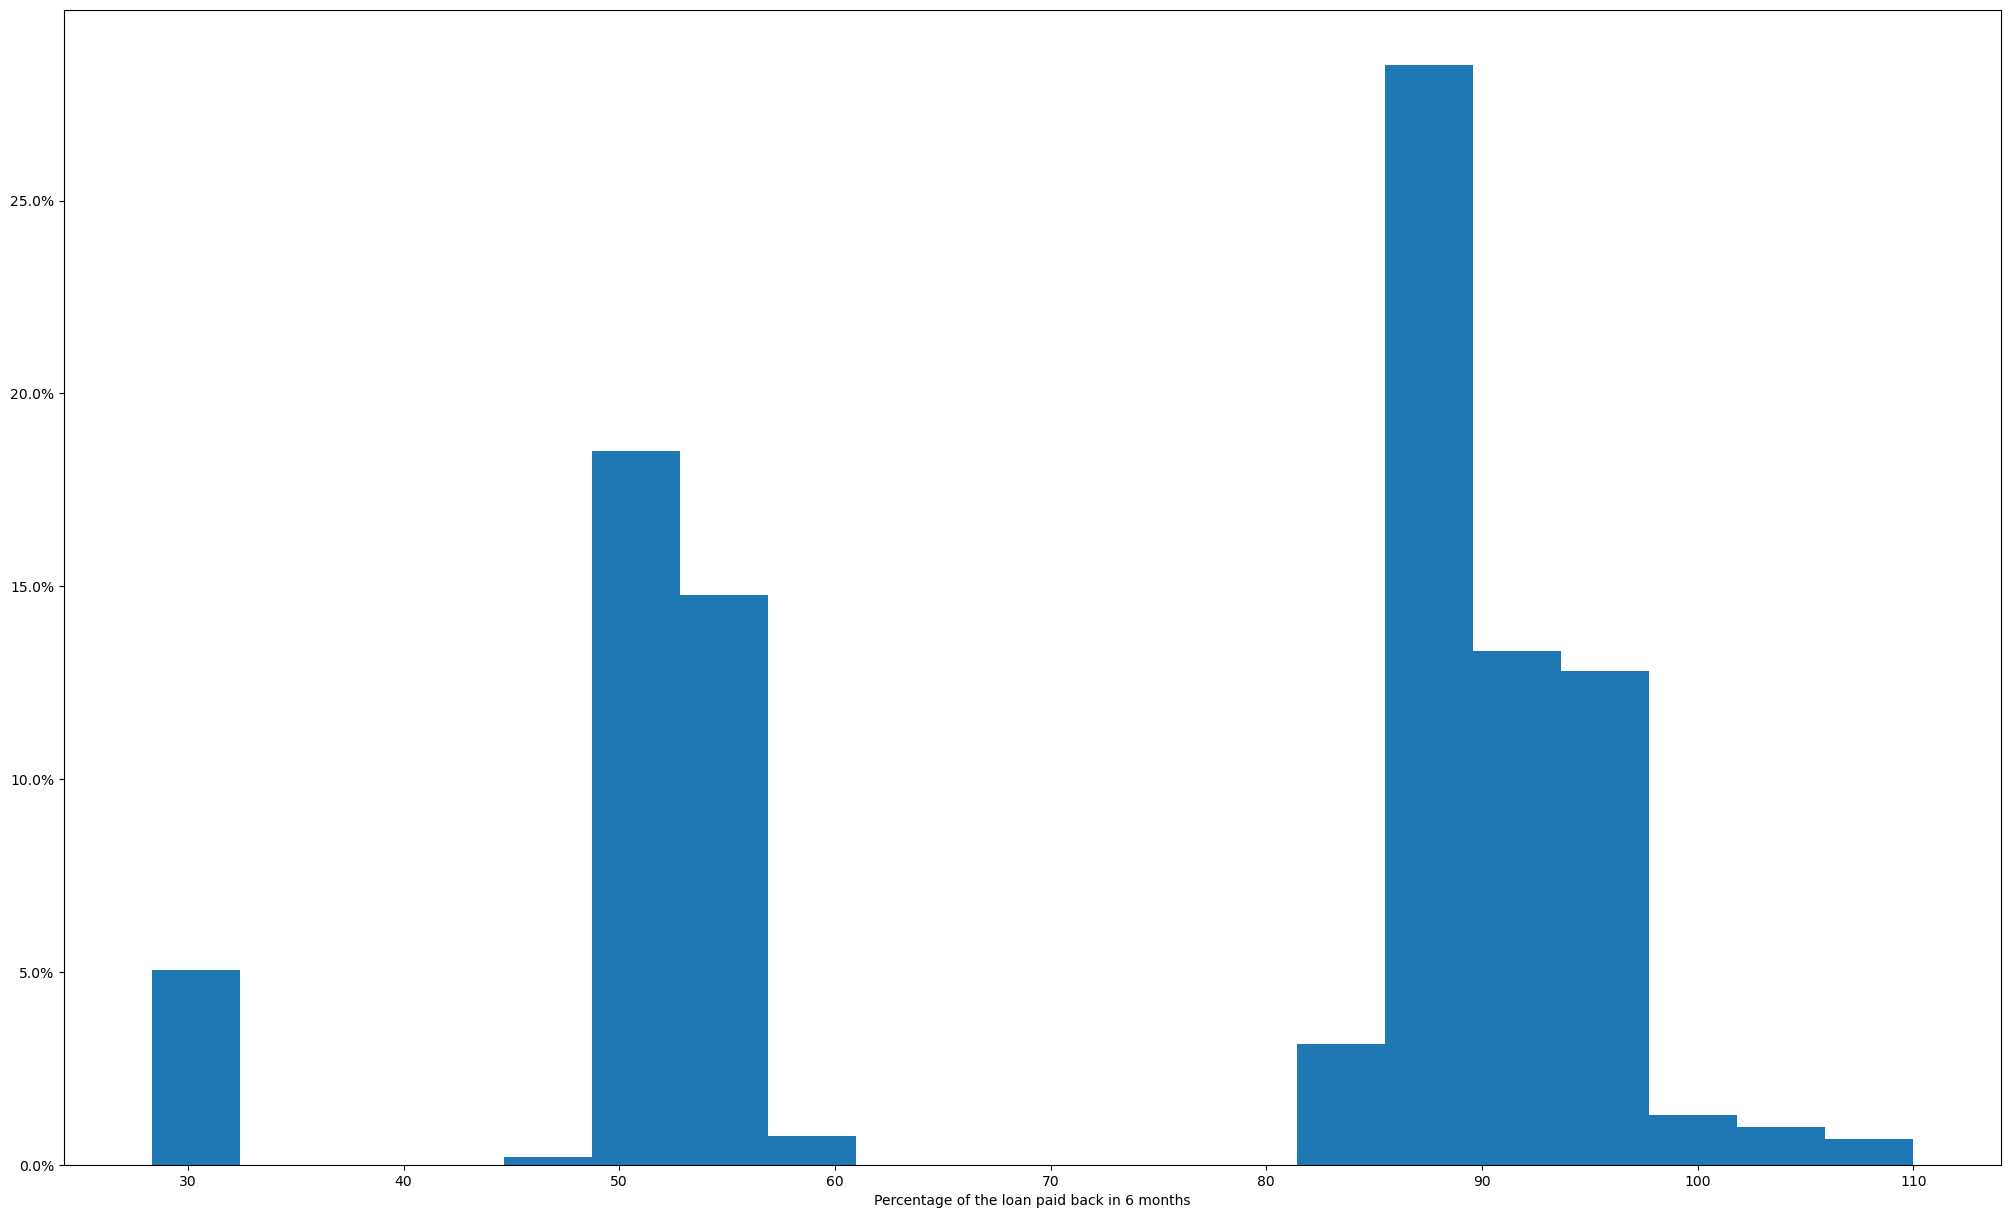

In [135]:
plt.hist(active_df["percentage_of_the_loan_paid_back_in_6_months"], weights=np.ones(len(active_df["percentage_of_the_loan_paid_back_in_6_months"])) / len(active_df["percentage_of_the_loan_paid_back_in_6_months"]), bins=20)
plt.gca().yaxis.set_major_formatter(PercentFormatter(1))
plt.xlabel("Percentage of the loan paid back in 6 months")

### Task 2: Calculating loss
The company wants to check what percentage of loans have been a loss to the company:

Loans marked as Charged Off in the loan_status column represent a loss to the company.


Calculate the percentage of charged off loans historically and the total amount that was paid towards these loans before being charged off.

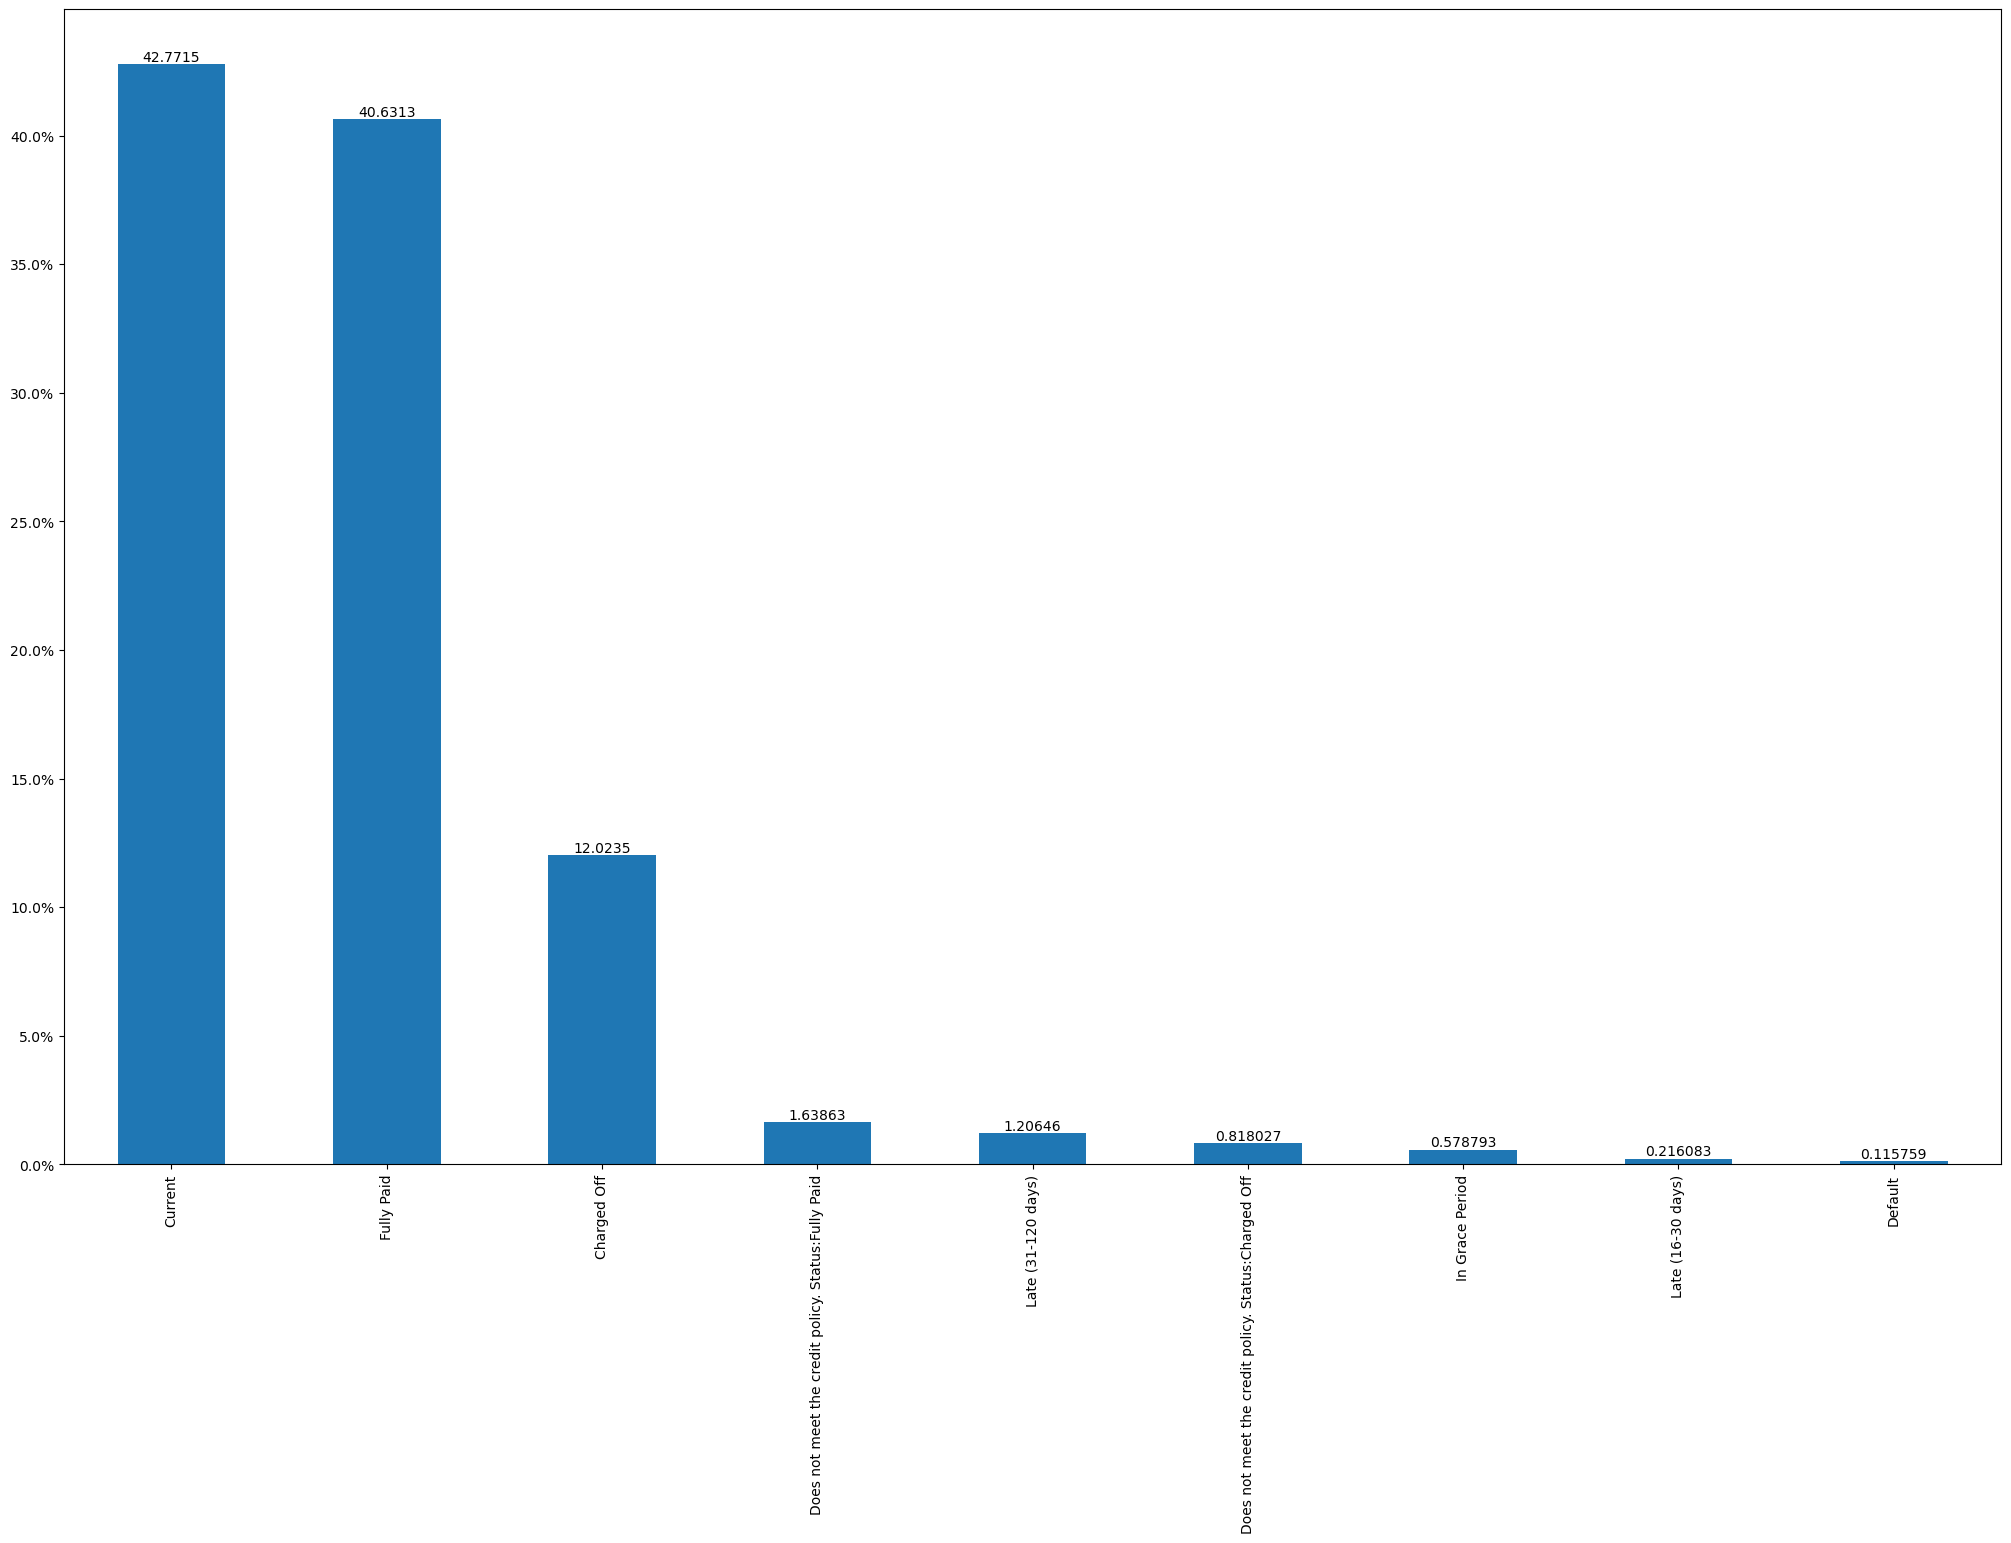

In [136]:

ax = (df_copy_filtered['loan_status'].value_counts(normalize=True) * 100).plot(kind = 'bar')
for container in ax.containers:
    ax.bar_label(container)
    ax.yaxis.set_major_formatter(mtick.PercentFormatter())

~10% of loans have been charged off.

Let's create a dataframe with the loans that have been charged off.

In [137]:
charged_off_df = df_copy_filtered.loc[df_copy_filtered['loan_status'] == "Charged Off"]

In [138]:
charged_off_df.shape

(4674, 40)

In [139]:
charged_off_df["percentage_of_the_loan_did_not_pay"] =  round((((charged_off_df["total_loan_amount"] - charged_off_df["total_payment"])/charged_off_df["total_loan_amount"]) * 100) , 2)

In [140]:
charged_off_df.head()

id  member_id  loan_amount  funded_amount  term_in_months  \
56   38654836   41438603        11200        11200.0              60   
90   38645713   41429516         8150         8150.0              36   
117  38644867   41428644         7000         7000.0              36   
138  38644180   41427896        14000        12000.0              36   
190  38634659   41418418        16000        16000.0              60   

     int_rate  instalment grade sub_grade  employment_length home_ownership  \
56      16.49      275.29     D        D3                  4           RENT   
90      19.99      302.85     E        E3                 11           RENT   
117     12.99      235.83     C        C2                  3           RENT   
138      7.49      435.43     A        A4                  1           RENT   
190     12.99      363.97     C        C2                  2           RENT   

     annual_inc verification_status issue_date  loan_status payment_plan  \
56      94000.0        Not Verified 2021-01-01  Charged Off            n   
90      34000.0     Source Verified 2021-01-01  Charged Off            n   
117     70000.0     Source Verified 2021-01-01  Charged Off            n   
138    140000.0     Source Verified 2021-01-01  Charged Off            n   
190     95000.0     Source Verified 2021-01-01  Charged Off            n   

                purpose    dti  delinq_2yrs earliest_credit_line  \
56   debt_consolidation  26.95            0           1997-04-01   
90   debt_consolidation  23.40            0           1990-04-01   
117  debt_consolidation  13.12            1           2009-05-01   
138  debt_consolidation  16.60            9           1989-08-01   
190    home_improvement  13.13            1           2001-02-01   

     inq_last_6mths  open_accounts  total_accounts  out_prncp  total_payment  \
56                1             16              36        0.0        1906.51   
90                0              8              13        0.0        1808.05   
117               2              9              19        0.0        1654.14   
138               0             10              28        0.0        1294.64   
190               1             14              31        0.0        1432.79   

     total_payment_inv  total_rec_prncp  total_rec_int  total_rec_late_fee  \
56             1906.51           885.52        1020.99                 0.0   
90             1808.05          1045.20         762.85                 0.0   
117            1654.14           321.84         139.72                 0.0   
138            1294.64          1056.35         238.29                 0.0   
190            1432.79           775.56         657.23                 0.0   

     recoveries  collection_recovery_fee last_payment_date  \
56         0.00                   0.0000        2021-08-01   
90         0.00                   0.0000        2021-07-01   
117     1192.58                 214.6644        2021-03-01   
138        0.00                   0.0000        2021-04-01   
190        0.00                   0.0000        2021-05-01   

     last_payment_amount last_credit_pull_date  policy_code application_type  \
56                275.29            2022-01-01            1       INDIVIDUAL   
90                302.85            2021-12-01            1       INDIVIDUAL   
117               235.83            2021-08-01            1       INDIVIDUAL   
138               435.43            2022-01-01            1       INDIVIDUAL   
190               363.97            2022-01-01            1       INDIVIDUAL   

     total_loan_amount  terms_completed  terms_remaining  \
56            16517.40                7               53   
90            10902.60                6               30   
117            8489.88                1               35   
138           15675.48                3               33   
190           21838.20                4               56   

     percentage_of_the_loan_paid_back  percentage_of_the_loan_did_not_pa

<AxesSubplot:xlabel='percentage_of_the_loan_did_not_pay', ylabel='Count'>

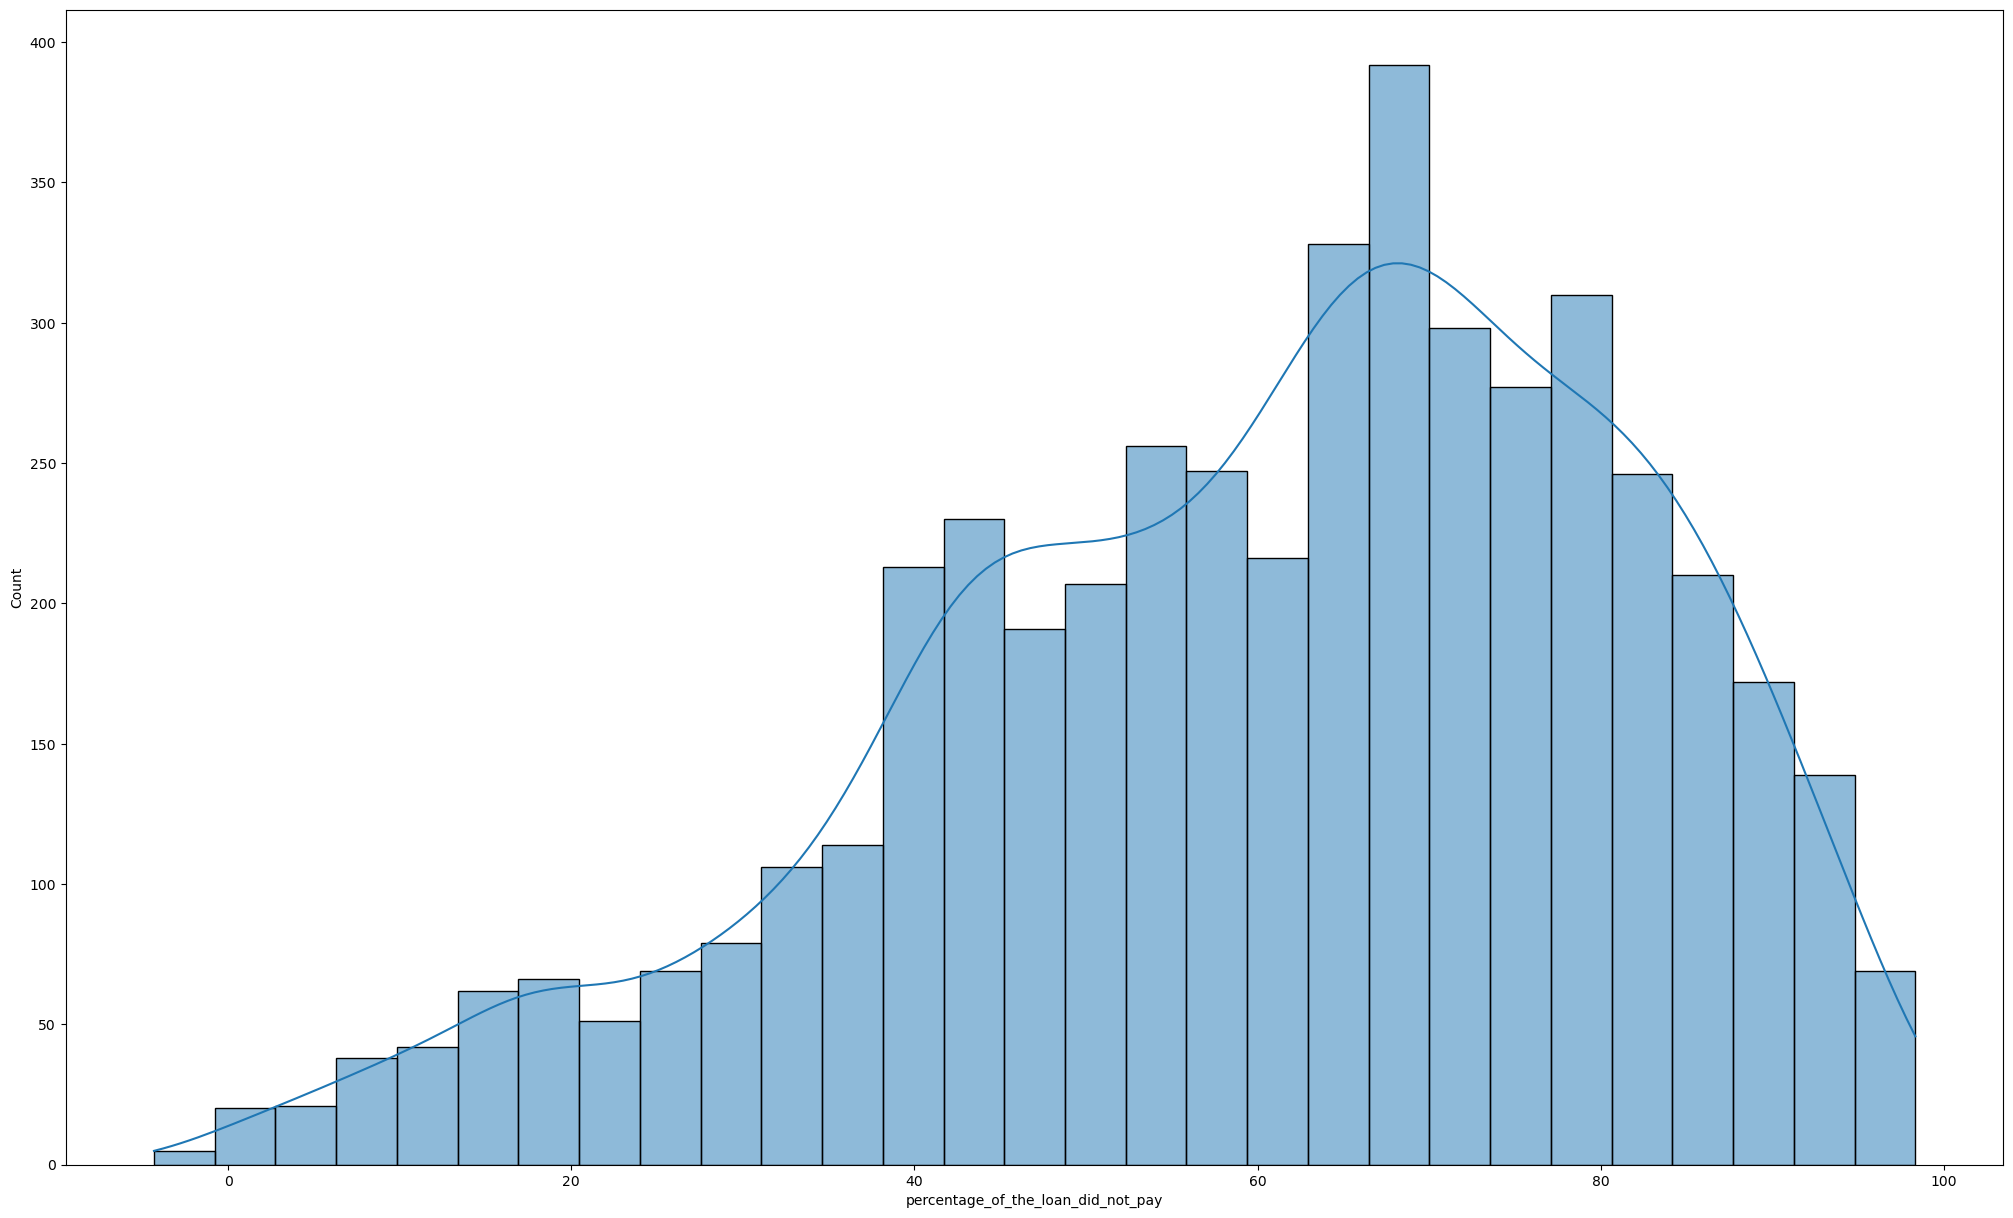

In [141]:
data_plot.plot_histogram(charged_off_df, "percentage_of_the_loan_did_not_pay")

So we can see the loss here. For most of the loans over 50% of the loan amount have not been paid back.

### Task 3: Calculating projected loss

In [142]:
charged_off_df["loan_amount_remaining"] = charged_off_df["total_loan_amount"] - charged_off_df["total_payment"]

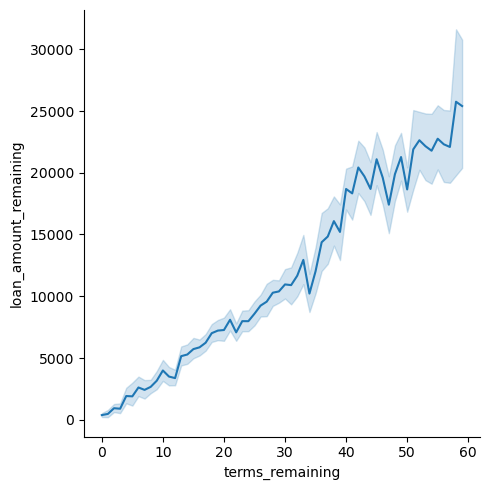

In [143]:
sns.relplot(data=charged_off_df, x="terms_remaining", y="loan_amount_remaining", kind="line")


### Task 4: Possible loss
There are customers who are currently behind with their loan payments. This subset of customers represent a risk to company revenue.


What percentage do users' in this bracket currently represent as a percentage of all loans? Calculate the total amount of customers in this bracket and how much loss the company would incur their status was changed to Charged Off. What is the projected loss of these loans if the customer were to finish the full loans term?


In [144]:
df_copy_filtered["loan_status"].value_counts(normalize=True)

Current                                                0.427715
Fully Paid                                             0.406313
Charged Off                                            0.120235
Does not meet the credit policy. Status:Fully Paid     0.016386
Late (31-120 days)                                     0.012065
Does not meet the credit policy. Status:Charged Off    0.008180
In Grace Period                                        0.005788
Late (16-30 days)                                      0.002161
Default                                                0.001158
Name: loan_status, dtype: float64

1.8% customers are behind their loan payements.

In [145]:
possible_loss_df = df_copy_filtered[df_copy_filtered["loan_status"].str.contains("Late")]

In [146]:
possible_loss_df["loan_amount_remaining"] = possible_loss_df["total_loan_amount"] - possible_loss_df["total_payment"]

In [147]:
possible_loss_df.head(5)

id  member_id  loan_amount  funded_amount  term_in_months  \
17   38655869   41439673        18825        18825.0              60   
140  38644147   41427862        15600        15600.0              36   
168  38635317   41419102         6000         6000.0              36   
171  38635273   41419056        15000        15000.0              36   
243  38625326   41409103         5000         5000.0              36   

     int_rate  instalment grade sub_grade  employment_length home_ownership  \
17      13.66      434.72     C        C3                 11       MORTGAGE   
140     14.99      540.71     C        C5                  8           RENT   
168      8.67      189.88     B        B1                 11       MORTGAGE   
171     13.16      471.37     A        A5                  6           RENT   
243     11.44      164.74     B        B4                 10       MORTGAGE   

     annual_inc verification_status issue_date         loan_status  \
17      52000.0            Verified 2021-01-01  Late (31-120 days)   
140    102000.0            Verified 2021-01-01  Late (31-120 days)   
168    106000.0        Not Verified 2021-01-01  Late (31-120 days)   
171     70000.0     Source Verified 2021-01-01  Late (31-120 days)   
243     35000.0        Not Verified 2021-01-01   Late (16-30 days)   

    payment_plan             purpose    dti  delinq_2yrs earliest_credit_line  \
17             n  debt_consolidation   8.98            2           1994-10-01   
140            n  debt_consolidation  25.91            0           1991-07-01   
168            n  debt_consolidation  15.07            0           1998-05-01   
171            n  debt_consolidation  11.25            3           1994-04-01   
243            n  debt_consolidation  30.18            0           2000-09-01   

     inq_last_6mths  open_accounts  total_accounts  out_prncp  total_payment  \
17                6             11              15   16748.37        3883.91   
140               3             17              39   11940.58        5394.11   
168               0              8              42    4487.25        1908.02   
171               1             13              21   11976.55        3764.14   
243               0             11              23    3649.02        1808.96   

     total_payment_inv  total_rec_prncp  total_rec_int  total_rec_late_fee  \
17             3883.91          2076.63        1807.28                 0.0   
140            5394.11          3659.42        1734.69                 0.0   
168            1908.02          1512.75         380.27                15.0   
171            3764.14          3023.45         740.69                 0.0   
243            1808.96          1350.98         457.98                 0.0   

     recoveries  collection_recovery_fee last_payment_date  \
17          0.0                      0.0        2021-10-01   
140         0.0                      0.0        2021-11-01   
168         0.0                      0.0        2021-11-01   
171         0.0                      0.0        2021-09-01   
243         0.0                      0.0        2021-12-01   

     last_payment_amount last_credit_pull_date  policy_code application_type  \
17                434.72            2022-01-01            1       INDIVIDUAL   
140               540.71            2022-01-01            1       INDIVIDUAL   
168               394.76            2022-01-01            1       INDIVIDUAL   
171               471.37            2021-09-01            1       INDIVIDUAL   
243               164.74            2022-01-01            1       INDIVIDUAL   

     total_loan_amount  terms_completed  terms_remaining  \
17            26083.20                9               51   
140           19465.56               10               26   
168            6835.68               10               26   
171           16969.32                8               28   
243            5930.64               11               25   

     percentage_of_the_loan_pa

In [148]:
print(f"Total possible loss: {possible_loss_df['loan_amount_remaining'].sum()}")

Total possible loss: 5890162.73


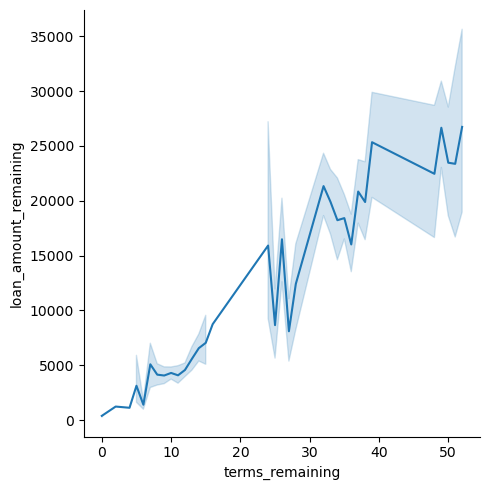

In [149]:
sns.relplot(data=possible_loss_df, x="terms_remaining", y="loan_amount_remaining", kind="line")


If customers late on payments converted to Charged Off, what percentage of total expected revenue do these customers and the customers who have already defaulted on their loan represent?

In [152]:
df_copy_filtered["revenue"] = df_copy_filtered["total_loan_amount"] - df_copy_filtered["loan_amount"]

In [170]:
total_revenue = df_copy_filtered['revenue'].sum()
total_revenue_of_defaulted_loan = df_copy_filtered.loc[df_copy_filtered['loan_status'] == 'Default', 'revenue'].sum()
total_revenue_of_loan_behind = df_copy_filtered.loc[df_copy_filtered['loan_status'].str.contains('Late')]['revenue'].sum()

In [172]:
print(f"Percentage of total revenue this group represents {(total_revenue_of_defaulted_loan + total_revenue_of_loan_behind) / total_revenue * 100}")

Percentage of total revenue this group represents 2.427325495567301


### Task 5: Indicators of loss

We will use previously created charged_off_df and possible_loss_df for this task.

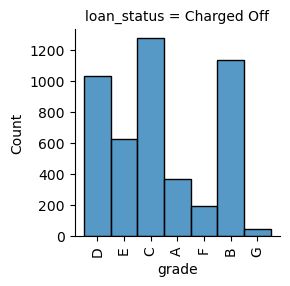

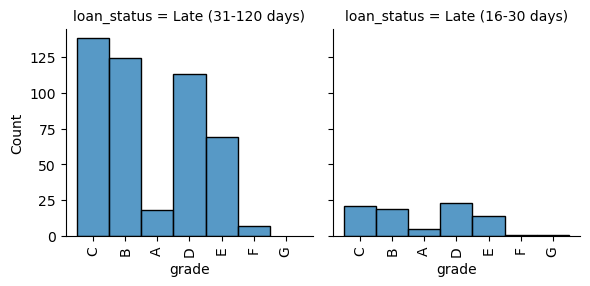

In [177]:
for df_iter in [charged_off_df, possible_loss_df]:
    
    data_plot.plot_facet_grids(df_iter, "grade", "loan_status")

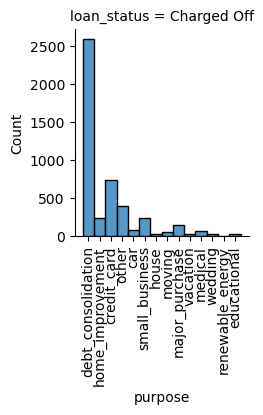

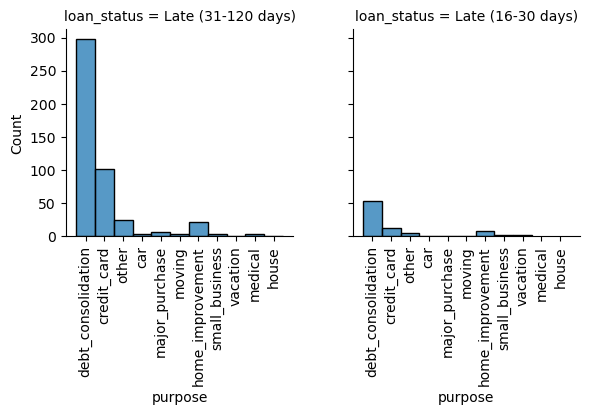

In [178]:
for df_iter in [charged_off_df, possible_loss_df]:
    
    data_plot.plot_facet_grids(df_iter, "purpose", "loan_status")

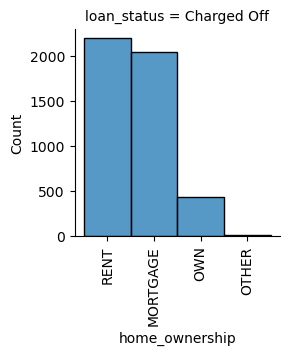

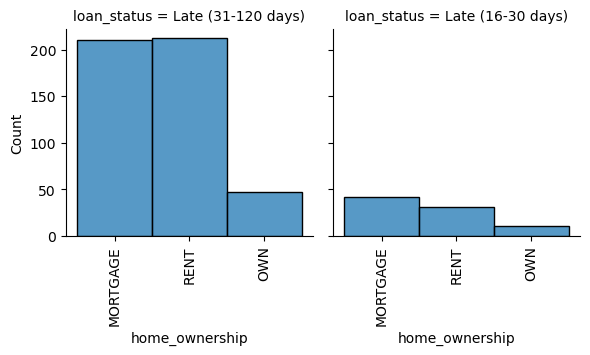

In [179]:
for df_iter in [charged_off_df, possible_loss_df]:
    
    data_plot.plot_facet_grids(df_iter, "home_ownership", "loan_status")

Loans with better grade have higher chance to pay off. However, loans with the pupose "debt_consolidation" have more charged off status and customers with late payment have higher chance of being charged off. 